# **Presenta: Jessica Briseño**

# **Librerías**  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn.cluster import DBSCAN


pd.set_option("display.float_format", "{:,.3f}".format)

# **1. Creación del dataframe**  
___

### **1.1. Importar datos del Censo de INEGI 2022** 

Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México 2022

* Lectura del archivo: admncion_cngmd2021.xlsx

In [2]:
df = pd.read_excel("admncion_cngmd2021_2.xlsx")  #, sheet_name='Hoja1')
print("El tamaño del df es:", df.shape)
df.head(3)

El tamaño del df es: (2469, 82)


,folio,totl_tom,conx_tot,ext_sani_km,ext_co_km,Pob_dren,Pobl_aPot,con_ex_p,dis_ex_p,res_ex_p,...,sub_fede,sub_esta,sub_muni,multas,ej_anter,total_in,dren_ext,ext_reha,ext_dren,ext_cole
0,1001,"329,552.000","324,115.000",4.866,"2,775.130",98.000,99.000,306.260,"2,468.870",NaN,...,NaN,NaN,NaN,NaN,NaN,"889,622,823.430",NaN,NaN,4.866,974.000
1,1002,"14,473.000","13,738.000","7,087.410",600.000,80.000,70.000,300.000,300.000,2.000,...,NaN,NaN,NaN,NaN,NaN,"914,517.000",NaN,NaN,85.000,85.000
2,1003,"16,871.000","19,288.000",227.800,311.620,98.000,99.000,74.860,236.760,NaN,...,"2,220,575.000",NaN,NaN,"314,296.000","1,464,280.000","42,545,534.000",1.300,NaN,1.520,NaN


### **1.2 Creación de columna con nombre de estado y Municipio** 

* A partir de la columna **folio** se crean la columna **cve_ent** que contiene la clave de la entidad federativa:

    - [x] **cve_ent** clave de la entidad federativa  

In [3]:
df["folio"]=df["folio"].astype(str)

def select_characters(text):
    if len(text) == 4:
        return text[0]     # Selecciona el primer carácter
    elif len(text) == 5:
        return text[:2]    # Selecciona los primeros dos caracteres
    else:
        return text        # No hace nada si la longitud es diferente

df['cve_ent'] = df['folio'].apply(select_characters)

* Se realiza la lectura del archivo **entidad_cngmd2021.csv** censo de INEGI como un dataframe, posteriormente se diseña un diccionario con los nombres y claves del estado. Seguido de lo anterior se genera una función  para generar descripción del estado (con entidad=01 busca en el diccionario de entidades y regresa el nombre del estado, si no lo encuentra, regresa 'Entidad desconocida'), finalmente se implementa la función de generación de descripción a cada fila del DataFrame. Se crea la columna **Name_Ent**.

    - [x] **cve_ent    ------>   Name_Ent** (nombre de la entidad federativa)

In [4]:
df_Edos = pd.read_csv("entidad_cngmd2021.csv", dtype={'entidad': str})  #La clave se lee como string
df_Edos.head(2)
 
diccionario_entidad = dict(zip(df_Edos['entidad'],df_Edos['descrip']))  #Convertir el DataFrame df_Clave_Edos en un diccionario

def generar_descripcion_Ent(entidad):
    desc_entidad = diccionario_entidad.get(entidad, 'Entidad desconocida')
    return f'{desc_entidad}'

df['Name_Ent'] = df.apply(lambda row: generar_descripcion_Ent(row['cve_ent']), axis=1)

* Se realiza la lectura del archivo **"mnpio_cngmd2021.csv** censo de INEGI como un dataframe, posteriormente se diseña un diccionario con los nombres y claves del municipio. Seguido de lo anterior se genera una función  para generar descripción del municipio (con municipio=01 busca en el diccionario de municipios y regresa el nombre del municipio, si no lo encuentra, regresa 'Municipio desconocido'), finalmente se implementa la función de generación de descripción a cada fila del DataFrame. Se crea la columna **Name_Mun**.

    - [x] **cve_ent    ------>   Name_Mun** (nombre de la entidad federativa)

In [5]:
df_Muns = pd.read_csv("mnpio_cngmd2021.csv", dtype={'folio': str})  #La clave se lee como string
df_Muns.head(2)

diccionario_mun = dict(zip(df_Muns['folio'],df_Muns['descrip']))

def generar_descripcion_Ent(entidad):
    desc_entidad = diccionario_mun.get(entidad, 'Municipio desconocido')
    return f'{desc_entidad}'

df['Name_Mun'] = df.apply(lambda row: generar_descripcion_Ent(row['folio']), axis=1)
df.head(5)

,folio,totl_tom,conx_tot,ext_sani_km,ext_co_km,Pob_dren,Pobl_aPot,con_ex_p,dis_ex_p,res_ex_p,...,multas,ej_anter,total_in,dren_ext,ext_reha,ext_dren,ext_cole,cve_ent,Name_Ent,Name_Mun
0,1001,"329,552.000","324,115.000",4.866,"2,775.130",98.000,99.000,306.260,"2,468.870",NaN,...,NaN,NaN,"889,622,823.430",NaN,NaN,4.866,974.000,1,Aguascalientes,Aguascalientes
1,1002,"14,473.000","13,738.000","7,087.410",600.000,80.000,70.000,300.000,300.000,2.000,...,NaN,NaN,"914,517.000",NaN,NaN,85.000,85.000,1,Aguascalientes,Asientos
2,1003,"16,871.000","19,288.000",227.800,311.620,98.000,99.000,74.860,236.760,NaN,...,"314,296.000","1,464,280.000","42,545,534.000",1.300,NaN,1.520,NaN,1,Aguascalientes,Calvillo
3,1004,"4,333.000","4,333.000",400.000,370.000,98.000,98.000,2.000,368.000,2.000,...,NaN,NaN,"7,223,000.000",NaN,NaN,400.000,NaN,1,Aguascalientes,Cosío
4,1005,"35,095.000","34,851.000",101.600,NaN,96.000,98.000,NaN,NaN,NaN,...,"3,589,099.910","3,589,099.910","110,530,539.220",13.000,NaN,NaN,NaN,1,Aguascalientes,Jesús María


In [6]:
df.to_excel('datos.xlsx', index=False, engine='openpyxl')

In [7]:
#Tipos de datos
df.dtypes

folio           object
totl_tom       float64
conx_tot       float64
ext_sani_km    float64
ext_co_km      float64
                ...   
ext_dren       float64
ext_cole       float64
cve_ent         object
Name_Ent        object
Name_Mun        object
Length: 85, dtype: object

# **2. Análisis Exploratorio**  
_____

Creación del dataframe df_df_Analisys1 con las variables seleccionadas para el análisis que son:

**folio  ->**   Indica el identificador de cada cuestionario compuesto por la clave de entidad y por la clave de municipio o delegación  

**total_in  ->**  Indica el ingreso por el suministro de agua potable y saneamiento durante el año 2020 (total de ingresos por suministro de bienes y servicios)  
**totl_tom    ->**   Indica el número total de tomas que cubre el servicio de agua entubada de la red pública  
Archivo: admncion_cngmd2021.xls  

**conx_tot ->**  Indica el total de número de conexiones a la red de drenaje y alcantarillado por tipo de usuario (conx_tot)  
**Pob_dren ->**   Indica el porcentaje de la población del municipio o de la demarcación territorial que tenia acceso al servicio de drenaje y alcantarillado de la red pública (dren_cab)  
Archivo: servdren_cngmd2021.xls

**Pobl_aPot  ->**   Indica el porcentaje de población municipal o demarcación territorial que contaba con acceso al servicio de agua de la red pública (pobl_prc)  
Archivo: servagua_cngmd2021.xls  

In [8]:
df_Analisys1=df[['totl_tom', 'conx_tot','Pob_dren', 'Pobl_aPot','total_in', 
                 'folio', 'cve_ent','Name_Ent', 'Name_Mun']]

print("El tamaño del dataframe para el análisis es:", df_Analisys1.shape)
df_Analisys1.head(2)

El tamaño del dataframe para el análisis es: (2469, 9)


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,folio,cve_ent,Name_Ent,Name_Mun
0,"329,552.000","324,115.000",98.000,99.000,"889,622,823.430",1001,1,Aguascalientes,Aguascalientes
1,"14,473.000","13,738.000",80.000,70.000,"914,517.000",1002,1,Aguascalientes,Asientos


### **2.1 Revisión de valores y valores nulos** 

In [9]:
df_Analisys1.isnull()
df_Analisys1.isnull().sum()

totl_tom     131
conx_tot     708
Pob_dren     563
Pobl_aPot     57
total_in     692
folio          0
cve_ent        0
Name_Ent       0
Name_Mun       0
dtype: int64

In [10]:
df_Analisys1.count()

totl_tom     2338
conx_tot     1761
Pob_dren     1906
Pobl_aPot    2412
total_in     1777
folio        2469
cve_ent      2469
Name_Ent     2469
Name_Mun     2469
dtype: int64

### **2.2 Descripción estadística** 

In [11]:
df_Analisys1.describe().T

,count,mean,std,min,25%,50%,75%,max
totl_tom,"2,338.000","11,617.353","46,772.576",4.000,711.000,"2,051.500","6,000.000","1,170,135.000"
conx_tot,"1,761.000","13,956.785","72,134.443",3.000,680.000,"2,051.000","6,726.000","2,250,000.000"
Pob_dren,"1,906.000",73.816,24.843,0.500,60.000,80.000,94.000,100.000
Pobl_aPot,"2,412.000",77.460,24.791,10.000,70.000,89.000,96.000,100.000
total_in,"1,777.000","50,885,566.946","414,168,338.008",321.000,"160,000.000","1,280,000.000","8,320,415.370","15,094,274,894.000"


### **2.3 Visualización de datos** 

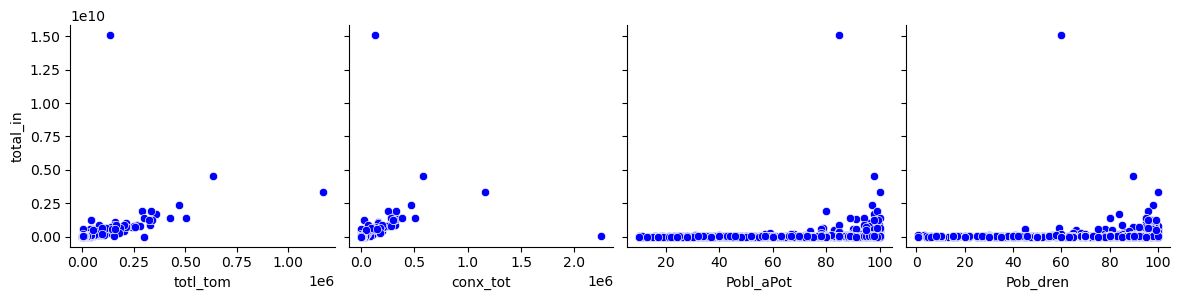

In [12]:
# Visualización de los datos
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")  # Suprimir advertencias específicas

Col_Var_x1 =['totl_tom', 'conx_tot','Pobl_aPot','Pob_dren']
Col_Var_y =['total_in']

g = sns.pairplot(df_Analisys1, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=3, plot_kws={'color': 'blue'})

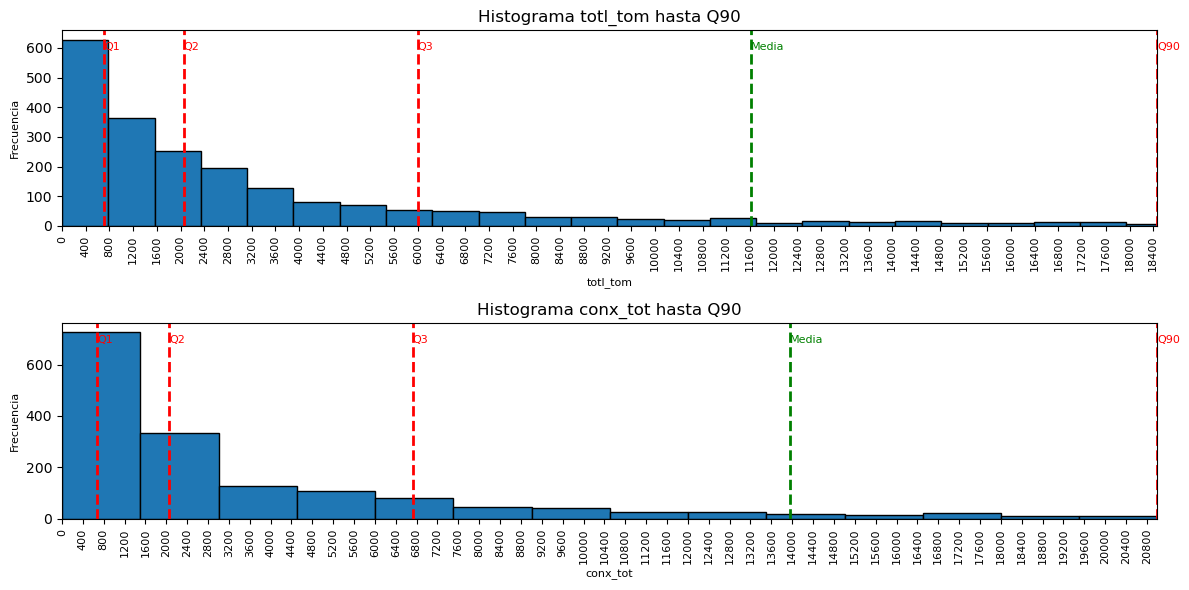

In [107]:
import matplotlib.pyplot as plt

# Lista de variables
variables = ['totl_tom','conx_tot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 8
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo manualmente
intervalo_x = 400  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]
    
    # Calcular los cuantiles
    Q1 = df[var].quantile(0.25)
    Q2 = df[var].quantile(0.50)
    Q3 = df[var].quantile(0.75)
    Qx = df[var].quantile(0.90)
    Med = df[var].mean()
        
    numero = 50
    if var in ["totl_tom", "conx_tot"]:
        numero = 1500
    elif var == "total_in":
        numero = 1800
    
    # Generar el histograma
    ax.hist(df[var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    ax.axvline(Med, color='g', linestyle='dashed', linewidth=2)
    ax.text(Med, max(ax.get_ylim()) * 0.9, 'Media', color='g', fontsize=axis_label_size)
    
    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)
    
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


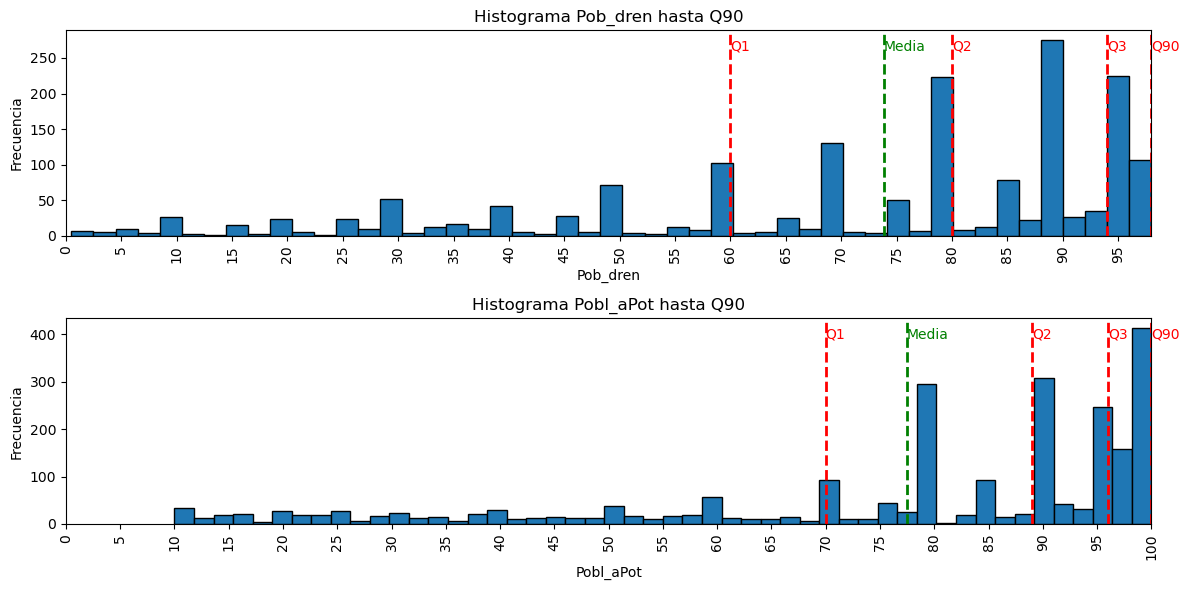

<Figure size 640x480 with 0 Axes>

In [108]:
import matplotlib.pyplot as plt

# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 10  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo manualmente
intervalo_x = 5  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]
    
    # Calcular los cuantiles
    Q1 = df[var].quantile(0.25)
    Q2 = df[var].quantile(0.50)
    Q3 = df[var].quantile(0.75)
    Qx = df[var].quantile(0.90)
    Med = df[var].mean()
    
    numero = 50

    # Generar el histograma
    ax.hist(df[var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    ax.axvline(Med, color='g', linestyle='dashed', linewidth=2)
    ax.text(Med, max(ax.get_ylim()) * 0.9, 'Media', color='g', fontsize=axis_label_size)
    
    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)
    
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()
plt.savefig('histograma_variable.png')

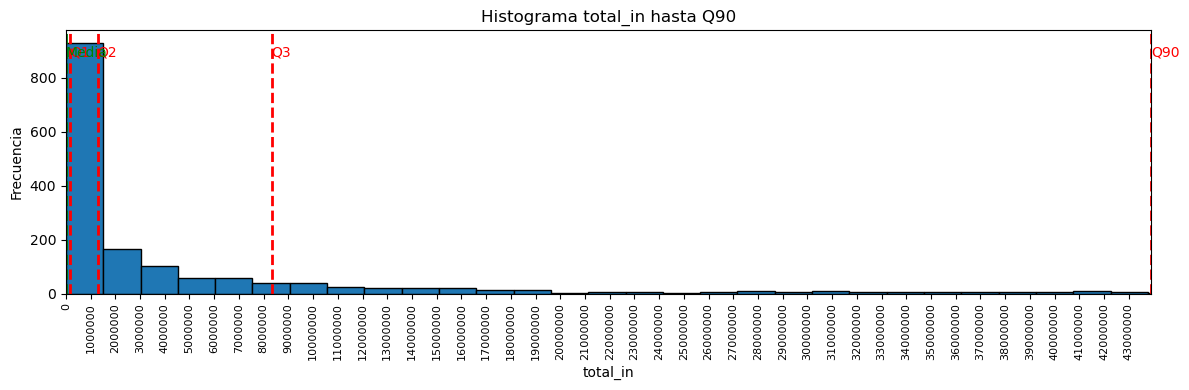

In [109]:
import matplotlib.pyplot as plt
# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot','total_in']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

selected_var = 'total_in'  # Cambia esta variable al nombre de la variable que deseas graficar

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 4))

# Definir el intervalo manualmente
intervalo_x = 1000000  # Cambia este valor según sea necesario

# Seleccionar la variable deseada
if selected_var in variables:
    # Calcular los cuantiles
    Q1 = df[selected_var].quantile(0.25)
    Q2 = df[selected_var].quantile(0.50)
    Q3 = df[selected_var].quantile(0.75)
    Qx = df[selected_var].quantile(0.90)
    Med = df[var].mean()    
    numero = 10000

    # Generar el histograma
    ax.hist(df[selected_var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {selected_var} hasta Q90')
    ax.set_xlabel(selected_var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    ax.axvline(Med, color='g', linestyle='dashed', linewidth=2)
    ax.text(Med, max(ax.get_ylim()) * 0.9, 'Media', color='g', fontsize=axis_label_size)
    
    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)
    
    # Ajustar el layout para evitar solapamientos
    plt.tight_layout()
    
    # Guardar la gráfica en formato PNG
    #plt.savefig('histograma_variable.png')
    
    # Mostrar la gráfica
    plt.show()
else:
    print(f'Variable {selected_var} no encontrada en la lista de variables.')


### **2.4 Detección de valores de valores atípicos**

- **Lista de 10 folios con ingresos mas altos y más bajos (total_in)**  
Con base en la tabla siguiente, se determina que el folio 15039	Estado de México	Ixtapaluca	15,094,274,894.0
es un dato atípico

In [16]:
df.sort_values("total_in",ascending=False).head(10)[['folio','Name_Ent','Name_Mun','totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', "total_in"]]

,folio,Name_Ent,Name_Mun,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
702,15039,Estado de México,Ixtapaluca,"134,624.000","136,038.000",60.000,85.000,"15,094,274,894.000"
14,2004,Baja California,Tijuana,"637,449.000","578,966.000",89.600,98.000,"4,559,694,557.000"
577,14039,Jalisco,Guadalajara,"1,170,135.000","1,164,305.000",100.000,100.000,"3,299,290,059.000"
347,11020,Guanajuato,León,"469,797.000","470,367.000",98.000,97.000,"2,342,206,650.760"
996,19039,Nuevo León,Monterrey,"335,097.000","331,865.000",96.000,99.000,"1,913,074,128.970"
1809,22014,Querétaro,Querétaro,"290,449.000","254,564.000",NaN,80.000,"1,895,036,863.000"
12,2002,Baja California,Mexicali,"356,964.000","315,632.000",84.000,98.000,"1,690,761,382.000"
696,15033,Estado de México,Ecatepec de Morelos,"428,144.000","389,221.000",80.000,89.000,"1,420,984,395.000"
1692,21114,Puebla,Puebla,"506,375.000","507,618.000",95.000,94.000,"1,416,260,601.090"
1818,23005,Quintana Roo,Benito Juárez,"301,185.000","285,618.000",95.100,100.000,"1,363,658,394.000"


In [17]:
df.sort_values("total_in",ascending=True).head(10)[['folio','Name_Ent','Name_Mun','totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', "total_in"]]

,folio,Name_Ent,Name_Mun,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
1693,21115,Puebla,Quecholac,221.000,NaN,90.000,20.000,321.000
1188,20180,Oaxaca,San Juan Bautista Lo de Soto,540.000,482.000,80.000,90.000,"1,000.000"
1064,20056,Oaxaca,Mártires de Tacubaya,300.000,NaN,NaN,66.000,"1,200.000"
1210,20202,Oaxaca,San Juan Lachao,518.000,NaN,NaN,31.000,"1,200.000"
1438,20430,Oaxaca,Santa María Tataltepec,150.000,NaN,NaN,99.000,"1,260.000"
1367,20359,Oaxaca,Santa Ana Yareni,260.000,270.000,90.000,100.000,"1,800.000"
1493,20485,Oaxaca,Santiago Tapextla,350.000,NaN,NaN,47.000,"2,000.000"
1515,20507,Oaxaca,Santo Domingo Armenta,"1,000.000",850.000,79.000,80.000,"2,000.000"
1522,20514,Oaxaca,Santo Domingo Roayaga,192.000,182.000,90.000,54.000,"2,400.000"
765,15102,Estado de México,Timilpan,"4,000.000",NaN,70.000,90.000,"2,600.000"


- **Lista de 10 folios las cantidades más altas y bajas de tomas totales (totl_tom)**

In [18]:
df.sort_values("totl_tom",ascending=False).head(10)[['folio','Name_Ent','Name_Mun',"total_in",  'Pobl_aPot','Pob_dren','conx_tot', "totl_tom"]]

,folio,Name_Ent,Name_Mun,total_in,Pobl_aPot,Pob_dren,conx_tot,totl_tom
577,14039,Jalisco,Guadalajara,"3,299,290,059.000",100.000,100.000,"1,164,305.000","1,170,135.000"
81,6010,Colima,Villa de Álvarez,NaN,100.000,98.000,"65,505.000","710,766.000"
14,2004,Baja California,Tijuana,"4,559,694,557.000",98.000,89.600,"578,966.000","637,449.000"
1692,21114,Puebla,Puebla,"1,416,260,601.090",94.000,95.000,"507,618.000","506,375.000"
347,11020,Guanajuato,León,"2,342,206,650.760",97.000,98.000,"470,367.000","469,797.000"
696,15033,Estado de México,Ecatepec de Morelos,"1,420,984,395.000",89.000,80.000,"389,221.000","428,144.000"
12,2002,Baja California,Mexicali,"1,690,761,382.000",98.000,84.000,"315,632.000","356,964.000"
1888,25006,Sinaloa,Culiacán,"1,201,402,177.000",99.500,99.000,"306,183.000","339,960.000"
996,19039,Nuevo León,Monterrey,"1,913,074,128.970",99.000,96.000,"331,865.000","335,097.000"
0,1001,Aguascalientes,Aguascalientes,"889,622,823.430",99.000,98.000,"324,115.000","329,552.000"


In [19]:
df.sort_values("totl_tom",ascending=True).head(10)[['folio','Name_Ent','Name_Mun',"total_in", 'Pobl_aPot','Pob_dren','conx_tot', "totl_tom"]]

,folio,Name_Ent,Name_Mun,total_in,Pobl_aPot,Pob_dren,conx_tot,totl_tom
2196,30104,Veracruz de Ignacio de la Llave,Mecayapan,NaN,34.000,70.000,"10,000.000",4.000
2175,30083,Veracruz de Ignacio de la Llave,Ixhuatlán de Madero,NaN,85.000,100.000,NaN,4.000
1629,21051,Puebla,Chietla,"166,824.260",15.000,1.000,NaN,13.000
2025,28036,Tamaulipas,San Nicolás,NaN,90.000,NaN,NaN,25.000
682,15019,Estado de México,Capulhuac,NaN,25.000,90.000,NaN,30.000
1296,20288,Oaxaca,San Miguel Yotao,NaN,30.000,NaN,NaN,40.000
2291,30199,Veracruz de Ignacio de la Llave,Zaragoza,NaN,80.000,70.000,NaN,40.000
695,15032,Estado de México,Donato Guerra,NaN,15.000,80.000,NaN,41.000
1330,20322,Oaxaca,San Pedro Ocopetatillo,NaN,80.000,70.000,30.000,45.000
1247,20239,Oaxaca,San Martín Huamelúlpam,"6,000.000",60.000,NaN,NaN,50.000


- **Lista de 10 folios las cantidades más altas y bajas de conexiones agua residual (conx_tot)**

In [20]:
df.sort_values("conx_tot",ascending=False).head(10)[['folio','Name_Ent','Name_Mun',"total_in",'Pob_dren', 'Pobl_aPot','totl_tom', "conx_tot"]]

,folio,Name_Ent,Name_Mun,total_in,Pob_dren,Pobl_aPot,totl_tom,conx_tot
913,17012,Morelos,Jojutla,"19,268,518.000",95.000,98.000,"14,467.000","2,250,000.000"
577,14039,Jalisco,Guadalajara,"3,299,290,059.000",100.000,100.000,"1,170,135.000","1,164,305.000"
14,2004,Baja California,Tijuana,"4,559,694,557.000",89.600,98.000,"637,449.000","578,966.000"
1692,21114,Puebla,Puebla,"1,416,260,601.090",95.000,94.000,"506,375.000","507,618.000"
347,11020,Guanajuato,León,"2,342,206,650.760",98.000,97.000,"469,797.000","470,367.000"
696,15033,Estado de México,Ecatepec de Morelos,"1,420,984,395.000",80.000,89.000,"428,144.000","389,221.000"
996,19039,Nuevo León,Monterrey,"1,913,074,128.970",96.000,99.000,"335,097.000","331,865.000"
224,8019,Chihuahua,Chihuahua,"1,326,602,408.470",96.000,91.000,NaN,"326,729.000"
0,1001,Aguascalientes,Aguascalientes,"889,622,823.430",98.000,99.000,"329,552.000","324,115.000"
12,2002,Baja California,Mexicali,"1,690,761,382.000",84.000,98.000,"356,964.000","315,632.000"


In [21]:
df.sort_values("conx_tot",ascending=True).head(20)[['folio','Name_Ent','Name_Mun',"total_in",'Pob_dren', 'Pobl_aPot','totl_tom', "conx_tot"]]

,folio,Name_Ent,Name_Mun,total_in,Pob_dren,Pobl_aPot,totl_tom,conx_tot
1962,26062,Sonora,Suaqui Grande,"629,844.750",95.000,95.000,466.000,3.000
491,13037,Hidalgo,Metztitlán,NaN,75.000,90.000,NaN,4.000
779,15116,Estado de México,Zacazonapan,NaN,99.000,100.000,"3,500.000",5.000
1000,19043,Nuevo León,Rayones,"555,630.150",96.000,99.000,401.000,8.000
2261,30169,Veracruz de Ignacio de la Llave,José Azueta,"4,925,008.030",27.000,32.000,"2,968.000",8.000
1664,21086,Puebla,Jalpan,NaN,60.000,80.000,200.000,10.000
490,13036,Hidalgo,San Agustín Metzquititlán,NaN,90.000,90.000,NaN,10.000
503,13049,Hidalgo,Pisaflores,"28,451.760",80.000,80.000,693.000,10.000
2162,30070,Veracruz de Ignacio de la Llave,Hidalgotitlán,NaN,22.000,22.000,"1,139.000",11.000
1763,21185,Puebla,Tlapanalá,"139,600.000",90.000,30.000,604.000,11.000


- **Lista de 10 folios los % más bajas de población servida con drenaje (Pob_dren)**

In [22]:
df.sort_values("Pob_dren",ascending=True).head(10)[['folio','Name_Ent','Name_Mun',"total_in",'totl_tom', 'conx_tot', 'Pobl_aPot', "Pob_dren"]]

,folio,Name_Ent,Name_Mun,total_in,totl_tom,conx_tot,Pobl_aPot,Pob_dren
773,15110,Estado de México,Valle de Bravo,"66,019,070.000","12,738.000",NaN,NaN,0.500
2223,30131,Veracruz de Ignacio de la Llave,Poza Rica de Hidalgo,"88,570,285.180","40,805.000",NaN,82.000,0.600
2289,30197,Veracruz de Ignacio de la Llave,Yecuatla,"109,885.980","1,117.000","1,177.000",28.000,0.600
2221,30129,Veracruz de Ignacio de la Llave,Platón Sánchez,"5,525,193.170","3,675.000","2,147.000",95.000,0.850
1815,23002,Quintana Roo,Felipe Carrillo Puerto,"17,478,353.810","18,886.000",116.000,98.000,1.000
1629,21051,Puebla,Chietla,"166,824.260",13.000,NaN,15.000,1.000
2093,30001,Veracruz de Ignacio de la Llave,Acajete,NaN,"1,200.000",550.000,19.000,2.000
24,4003,Campeche,Carmen,"142,660,111.250","58,183.000","11,000.000",85.000,3.000
1030,20022,Oaxaca,Cosoltepec,"146,940.000",375.000,35.000,54.000,4.000
414,12041,Guerrero,Malinaltepec,"18,000.000",686.000,500.000,80.000,4.000


In [23]:
df.sort_values("Pob_dren",ascending=False).head(10)[['folio','Name_Ent','Name_Mun',"total_in",'totl_tom', 'conx_tot','Pobl_aPot', "Pob_dren"]]

,folio,Name_Ent,Name_Mun,total_in,totl_tom,conx_tot,Pobl_aPot,Pob_dren
244,8039,Chihuahua,López,"1,748,999.000","1,163.000","1,163.000",100.000,100.000
2061,29029,Tlaxcala,Tepeyanco,"261,223.000","3,223.000","2,922.000",100.000,100.000
1307,20299,Oaxaca,San Pablo Yaganiza,NaN,250.000,250.000,100.000,100.000
1255,20247,Oaxaca,Capulálpam de Méndez,"65,270.000",812.000,812.000,100.000,100.000
2040,29008,Tlaxcala,Cuapiaxtla,"1,440,931.000","2,628.000",57.000,100.000,100.000
2041,29009,Tlaxcala,Cuaxomulco,"432,000.000","1,500.000","1,600.000",100.000,100.000
1224,20216,Oaxaca,San Juan Tabaá,"30,000.000",344.000,344.000,100.000,100.000
134,7053,Chiapas,Mazapa de Madero,NaN,489.000,489.000,80.000,100.000
2043,29011,Tlaxcala,Muñoz de Domingo Arenas,"305,128.000",789.000,789.000,98.000,100.000
1192,20184,Oaxaca,San Juan Bautista Tuxtepec,"10,635,921.300","22,400.000",NaN,100.000,100.000


- **Lista de 10 folios los % más bajas de población servida con Agua Potable (Pobl_aPot)**

In [24]:
df.sort_values("Pobl_aPot",ascending=True).head(10)[['folio','Name_Ent','Name_Mun',"total_in",'totl_tom', 'conx_tot', 'Pob_dren', "Pobl_aPot"]]

,folio,Name_Ent,Name_Mun,total_in,totl_tom,conx_tot,Pob_dren,Pobl_aPot
1995,28006,Tamaulipas,Bustamante,NaN,900.000,68.000,10.000,10.000
1338,20330,Oaxaca,San Pedro Teutila,NaN,500.000,NaN,NaN,10.000
1111,20103,Oaxaca,San Antonino Castillo Velasco,"48,760.000",116.000,"1,560.000",60.000,10.000
1647,21069,Puebla,Huaquechula,"110,612.000","1,200.000","1,200.000",99.000,10.000
389,12016,Guerrero,Coahuayutla de José María Izazaga,NaN,"1,164.000",402.000,10.000,10.000
1488,20480,Oaxaca,Santiago Nundiche,"16,950.000",104.000,NaN,NaN,10.000
138,7057,Chiapas,Motozintla,"3,575,434.640","7,614.000","6,385.000",80.000,10.000
452,12079,Guerrero,José Joaquín de Herrera,NaN,680.000,"1,285.000",10.000,10.000
2276,30184,Veracruz de Ignacio de la Llave,Tlaquilpa,NaN,310.000,400.000,25.000,10.000
1723,21145,Puebla,San Sebastián Tlacotepec,NaN,"1,750.000","2,050.000",45.000,10.000


In [25]:
df.sort_values("Pobl_aPot",ascending=False).head(10)[['folio','Name_Ent','Name_Mun',"total_in",'totl_tom', 'conx_tot', 'Pob_dren', "Pobl_aPot"]]

,folio,Name_Ent,Name_Mun,total_in,totl_tom,conx_tot,Pob_dren,Pobl_aPot
1176,20168,Oaxaca,San José Estancia Grande,NaN,250.000,NaN,NaN,100.000
1187,20179,Oaxaca,San Juan Bautista Jayacatlán,"40,800.000",350.000,NaN,NaN,100.000
1224,20216,Oaxaca,San Juan Tabaá,"30,000.000",344.000,344.000,100.000,100.000
1204,20196,Oaxaca,San Juan Evangelista Analco,"508,000.000",296.000,147.000,70.000,100.000
1201,20193,Oaxaca,San Juan del Estado,"99,000.000",900.000,NaN,NaN,100.000
2073,29041,Tlaxcala,Papalotla de Xicohténcatl,"980,000.000","12,200.000","12,200.000",95.000,100.000
1192,20184,Oaxaca,San Juan Bautista Tuxtepec,"10,635,921.300","22,400.000",NaN,100.000,100.000
299,10011,Durango,Indé,"20,000.000",300.000,142.000,50.000,100.000
298,10010,Durango,Hidalgo,"101,079.670",193.000,280.000,80.000,100.000
1189,20181,Oaxaca,San Juan Bautista Suchitepec,"37,100.000",243.000,NaN,NaN,100.000


- **Resumen: Lista de 10 folios con los valores más altos de tomas**

In [26]:
df.sort_values("total_in",ascending=False).head(15)[['folio','Name_Ent','Name_Mun',"Pobl_aPot","Pob_dren","totl_tom","conx_tot","total_in"]]

,folio,Name_Ent,Name_Mun,Pobl_aPot,Pob_dren,totl_tom,conx_tot,total_in
702,15039,Estado de México,Ixtapaluca,85.000,60.000,"134,624.000","136,038.000","15,094,274,894.000"
14,2004,Baja California,Tijuana,98.000,89.600,"637,449.000","578,966.000","4,559,694,557.000"
577,14039,Jalisco,Guadalajara,100.000,100.000,"1,170,135.000","1,164,305.000","3,299,290,059.000"
347,11020,Guanajuato,León,97.000,98.000,"469,797.000","470,367.000","2,342,206,650.760"
996,19039,Nuevo León,Monterrey,99.000,96.000,"335,097.000","331,865.000","1,913,074,128.970"
1809,22014,Querétaro,Querétaro,80.000,NaN,"290,449.000","254,564.000","1,895,036,863.000"
12,2002,Baja California,Mexicali,98.000,84.000,"356,964.000","315,632.000","1,690,761,382.000"
696,15033,Estado de México,Ecatepec de Morelos,89.000,80.000,"428,144.000","389,221.000","1,420,984,395.000"
1692,21114,Puebla,Puebla,94.000,95.000,"506,375.000","507,618.000","1,416,260,601.090"
1818,23005,Quintana Roo,Benito Juárez,100.000,95.100,"301,185.000","285,618.000","1,363,658,394.000"


In [27]:
df.sort_values("total_in",ascending=True).head(15)[['folio','Name_Ent','Name_Mun',"Pobl_aPot","Pob_dren","totl_tom","conx_tot","total_in"]]

,folio,Name_Ent,Name_Mun,Pobl_aPot,Pob_dren,totl_tom,conx_tot,total_in
1693,21115,Puebla,Quecholac,20.000,90.000,221.000,NaN,321.000
1188,20180,Oaxaca,San Juan Bautista Lo de Soto,90.000,80.000,540.000,482.000,"1,000.000"
1064,20056,Oaxaca,Mártires de Tacubaya,66.000,NaN,300.000,NaN,"1,200.000"
1210,20202,Oaxaca,San Juan Lachao,31.000,NaN,518.000,NaN,"1,200.000"
1438,20430,Oaxaca,Santa María Tataltepec,99.000,NaN,150.000,NaN,"1,260.000"
1367,20359,Oaxaca,Santa Ana Yareni,100.000,90.000,260.000,270.000,"1,800.000"
1493,20485,Oaxaca,Santiago Tapextla,47.000,NaN,350.000,NaN,"2,000.000"
1515,20507,Oaxaca,Santo Domingo Armenta,80.000,79.000,"1,000.000",850.000,"2,000.000"
1522,20514,Oaxaca,Santo Domingo Roayaga,54.000,90.000,192.000,182.000,"2,400.000"
765,15102,Estado de México,Timilpan,90.000,70.000,"4,000.000",NaN,"2,600.000"


#### **2.4.1 DBScan con GridSearcpara detección de valores de valores atípicos**

In [28]:
df_Analisys0=df[['totl_tom', 'conx_tot', 'ext_sani_km', 'ext_co_km','Pob_dren','Pobl_aPot',"total_in",
                 "folio","cve_ent","Name_Ent","Name_Mun"]].copy()

print("El tamaño del df_Analisys0 es:", df_Analisys0.shape)
df_Analisys0.head(2)

El tamaño del df_Analisys0 es: (2469, 11)


,totl_tom,conx_tot,ext_sani_km,ext_co_km,Pob_dren,Pobl_aPot,total_in,folio,cve_ent,Name_Ent,Name_Mun
0,"329,552.000","324,115.000",4.866,"2,775.130",98.000,99.000,"889,622,823.430",1001,1,Aguascalientes,Aguascalientes
1,"14,473.000","13,738.000","7,087.410",600.000,80.000,70.000,"914,517.000",1002,1,Aguascalientes,Asientos


In [29]:
df_Analisys0 = df_Analisys0.reset_index(drop=True)

df_Analisys0["totl_tom"].fillna(df_Analisys0["totl_tom"].dropna().median(),inplace=True)
df_Analisys0["conx_tot"].fillna(df_Analisys0["conx_tot"].dropna().median(),inplace=True)
df_Analisys0["ext_sani_km"].fillna(df_Analisys0["ext_sani_km"].dropna().median(),inplace=True)
df_Analisys0["ext_co_km"].fillna(df_Analisys0["ext_co_km"].dropna().median(),inplace=True)
df_Analisys0["Pob_dren"].fillna(df_Analisys0["Pob_dren"].dropna().median(),inplace=True)
df_Analisys0["Pobl_aPot"].fillna(df_Analisys0["Pobl_aPot"].dropna().median(),inplace=True)
df_Analisys0["total_in"].fillna(df_Analisys0["total_in"].dropna().median(),inplace=True)

df_clasif = df_Analisys0.iloc[:, [0,1,4,5,6]].copy()   #2,3,

DB_scaler = StandardScaler()
X_scaled= DB_scaler.fit_transform(df_clasif)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [ 0.07535393  0.04931668 -0.01429394 -0.03097143 -0.0495816  -0.03367577
 -0.05501093 -0.07248495  0.12278665  0.40160915  0.49390416  0.49069887
  0.47091166  0.43540289  0.4603061   0.41486624  0.62027768  0.62027768
  0.6951825   0.70947958  0.69815713  0.69627541  0.69627541  0.69179268
  0.73680865  0.76296291  0.75584283  0.75584283  0.75584283  0.71740243
  0.74096595  0.73978823  0.81618518  0.81618518  0.81295655  0.8168792
  0.78517166  0.7834453   0.7834453   0.7834453          nan         nan
  0.82053678  0.82445943  0.82445943  0.82336755  0.82336755  0.82336755
         nan         nan  0.83706706  0.82965842  0.82903368  0.82903368
  0.82903368  0.82903368         nan         nan         nan         nan
  0.83821383  0.83080519  0.83080519  0.83080519         nan         nan
         nan         nan         nan         nan       

Best Parameters: {'eps': 3.5, 'min_samples': 7}
Número de clusters encontrados por DBSCAN: 1
DBScan Clustering Silhouette Score: 0.92


,totl_tom,conx_tot,ext_sani_km,ext_co_km,Pob_dren,Pobl_aPot,total_in,folio,cve_ent,Name_Ent,Name_Mun,cluster_db
14,"637,449.000","578,966.000","4,013.000","4,046.000",89.600,98.000,"4,559,694,557.000",2004,2,Baja California,Tijuana,-1
81,"710,766.000","65,505.000",487.480,579.390,98.000,100.000,"1,280,000.000",6010,6,Colima,Villa de Álvarez,-1
224,"2,051.500","326,729.000","3,108.000","3,806.090",96.000,91.000,"1,326,602,408.470",8019,8,Chihuahua,Chihuahua,-1
577,"1,170,135.000","1,164,305.000","8,577.000","8,570.890",100.000,100.000,"3,299,290,059.000",14039,14,Jalisco,Guadalajara,-1
702,"134,624.000","136,038.000","14,709.000",972.000,60.000,85.000,"15,094,274,894.000",15039,15,Estado de México,Ixtapaluca,-1
913,"14,467.000","2,250,000.000",120.000,169.830,95.000,98.000,"19,268,518.000",17012,17,Morelos,Jojutla,-1


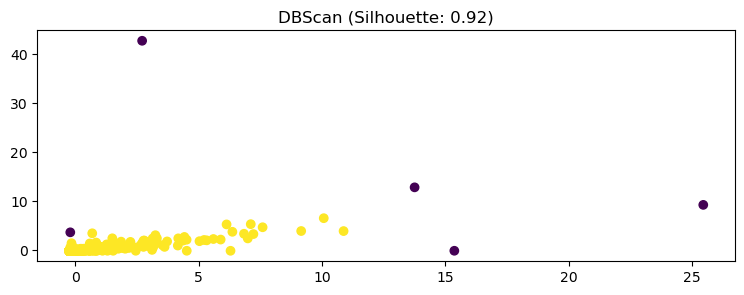

In [30]:

# Definir una función de métrica personalizada para silhouette score
def silhouette_scorer(estimator, X):
    estimator.fit(X)
    labels = estimator.labels_
    score = silhouette_score(X, labels)
    return score

# Definimos los parámetros epsilon y min_samples que queremos probar
param_grid = {
    #'eps': [0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,15,20],
    'eps': [0.1, 0.5, 1.0, 1.5,2.0,2.5, 3.0,3.5, 4.0,4.5, 5.0,5.25,5.5,5.75,6,6.5,7,7.5,10,25,50,75],
    'min_samples': [2,3,5,6,7,8,9, 10]
}

# Creamos el modelo DBSCAN
dbscan = DBSCAN()

# Creamos un objeto GridSearchCV utilizando la función de métrica personalizada
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(X_scaled)

# Mejores parámetros encontrados
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Creamos el modelo DBSCAN con los mejores parámetros encontrados
best_eps = best_params['eps']
best_min_samples = best_params['min_samples']
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

# Ajustamos el modelo DBSCAN a los datos con los mejores parámetros
best_dbscan.fit(X_scaled)
best_labels = best_dbscan.labels_

# Número de clusters encontrados por DBSCAN (ignorando el ruido, si hay)
best_n_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
print(f'Número de clusters encontrados por DBSCAN: {best_n_clusters}')

################################################################# Métrica de silhouette con los mejores parámetros

dbscan_labels = best_dbscan.labels_

DBScan_clus = best_dbscan.fit_predict(X_scaled)
DBScan_best_silhouette = silhouette_score(X_scaled, dbscan_labels)
print(f'DBScan Clustering Silhouette Score: {DBScan_best_silhouette:.2f}')

################################################################  Visualizar los clusters

# DBScan
plt.figure(figsize=(9, 3))
plt.scatter(X_scaled[:, 0], X_scaled[:, 4], c=dbscan_labels, cmap='viridis')
plt.title(f'DBScan (Silhouette: {DBScan_best_silhouette :.2f})')

################################################################  Visualizar los clusters

df_Analisys0["cluster_db"]=dbscan_labels
#df_clasif['cluster2'] = kmeans.predict(X_scaled)

df_Analisys0["cluster_db"].value_counts()   

df_Analisys0[df_Analisys0["cluster_db"]==-1]


Coinciden los folios:  15039,14039,17012,14101,21021,30048,2004   
el que se adiciona a la lista de datos atípicos es el 6010


### **2.5 Eliminación de valores de valores atípicos**

In [31]:
df_Analisys1=df[['totl_tom', 'conx_tot', 'Pob_dren','Pobl_aPot',"total_in",  #'ext_sani_km', 'ext_co_km',
                 "folio","cve_ent","Name_Ent","Name_Mun"]].copy()
df_Analisys1 = df_Analisys1.reset_index(drop=True)
print("El tamaño del df_Analisys0 es:", df_Analisys1.shape)

El tamaño del df_Analisys0 es: (2469, 9)


In [32]:
# valores_folio es una lista de los outlayers identificados

valores_folio = ["15039","2115","31002","30104","21051","29007","2016","17012","26062","19043",
                  "30169","21185","28031","17032","7037","15116","11038","30135","14031","20396",
                  "5037","26062","15116","19043","30169","21086","13036","13049","21185",
                  "28031","21057","17032","7037","20351","11038","30135","14031","20396",
                  "5037","7112","26015","20394","29031","8046","30120","21026","17024",
                  "30062","20022","20191","30019","30096","30140","28010","14110","20031",
                  "20361","15115","20051","4002","15056","30178","20492","29008","29007","28026","15110",
                  "2004","6010","8019","14039","15039","17012",             #Con DBScan
                  "31050",   #Con DBScan
                  "20401","8017","22011","22006","32010","22017","30131",     #eliminación manual Final
                  "21114","11020",   #ciudad leon y Puebla 
                  "15013","21140","26026","26048","28040","30193", "11041","23004",
                  "30040","30045","11020"]  

# Filtra el DataFrame para los folios deseados
df_folios_OutLayers = df[df['folio'].isin(valores_folio)]

# Muestra el resultado
print(df_folios_OutLayers.shape)
df_folios_OutLayers.head(100)

(75, 85)


,folio,totl_tom,conx_tot,ext_sani_km,ext_co_km,Pob_dren,Pobl_aPot,con_ex_p,dis_ex_p,res_ex_p,...,multas,ej_anter,total_in,dren_ext,ext_reha,ext_dren,ext_cole,cve_ent,Name_Ent,Name_Mun
14,2004,"637,449.000","578,966.000","4,013.000","4,046.000",89.600,98.000,"3,096.000",950.000,"1,835.000",...,"93,823,952.000","88,571,393.400","4,559,694,557.000",NaN,NaN,"1,050.000",232.000,2,Baja California,Tijuana
23,4002,"78,447.000",50.000,30.000,628.310,60.000,NaN,161.350,466.960,NaN,...,NaN,"8,875,563.570","203,033,644.440",30.000,NaN,NaN,NaN,4,Campeche,Campeche
70,5037,"2,542.000",25.000,NaN,NaN,10.000,100.000,NaN,NaN,NaN,...,NaN,NaN,"821,718.000",NaN,NaN,NaN,NaN,5,Coahuila de Zaragoza,Villa Unión
81,6010,"710,766.000","65,505.000",487.480,579.390,98.000,100.000,107.060,472.330,NaN,...,NaN,NaN,NaN,NaN,NaN,0.400,0.100,6,Colima,Villa de Álvarez
118,7037,"6,500.000",20.000,30.000,23.000,90.000,85.000,7.000,16.000,NaN,...,NaN,NaN,"235,000.000",20.000,5.000,10.000,NaN,7,Chiapas,Huehuetán
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,30178,"2,812.000",54.000,18.200,30.550,80.000,95.000,2.500,28.050,NaN,...,"46,553.820","9,450.760","7,093,487.910",NaN,NaN,5.600,NaN,30,Veracruz de Ignacio de la Llave,Tlacotalpan
2285,30193,"216,981.000","182,937.000","71,695.000","1,616.760",79.300,93.800,64.760,"1,552.000",NaN,...,NaN,NaN,NaN,NaN,NaN,12.300,NaN,30,Veracruz de Ignacio de la Llave,Veracruz
2306,31002,"5,889.000",NaN,NaN,58.000,NaN,100.000,8.000,50.000,NaN,...,NaN,NaN,"18,000.000",NaN,NaN,NaN,NaN,31,Yucatán,Acanceh
2354,31050,"297,763.000",NaN,NaN,"3,746.880",NaN,88.000,150.160,"3,596.720",NaN,...,NaN,NaN,"161,007.000",NaN,NaN,NaN,NaN,31,Yucatán,Mérida


In [33]:
print( df_Analisys1.shape)
# Eliminar las filas donde el valor de 'folio' está en la lista valores_folio
df_filtrado = df_Analisys1[~df_Analisys1['folio'].isin(valores_folio)]
df_Analisys1=df_filtrado.copy()
print( df_Analisys1.shape)

(2469, 9)
(2394, 9)


In [34]:
df_Analisys1.describe().T

,count,mean,std,min,25%,50%,75%,max
totl_tom,"2,266.000","9,846.269","31,563.194",4.000,720.000,"2,034.000","5,956.250","428,144.000"
conx_tot,"1,695.000","10,938.087","33,288.860",4.000,746.500,"2,113.000","6,690.500","389,221.000"
Pob_dren,"1,836.000",74.164,24.407,0.600,60.000,80.000,94.000,100.000
Pobl_aPot,"2,339.000",77.375,24.871,10.000,70.000,89.000,96.000,100.000
total_in,"1,723.000","34,677,231.619","147,400,362.613",321.000,"158,370.000","1,271,509.000","7,918,931.150","1,913,074,128.970"


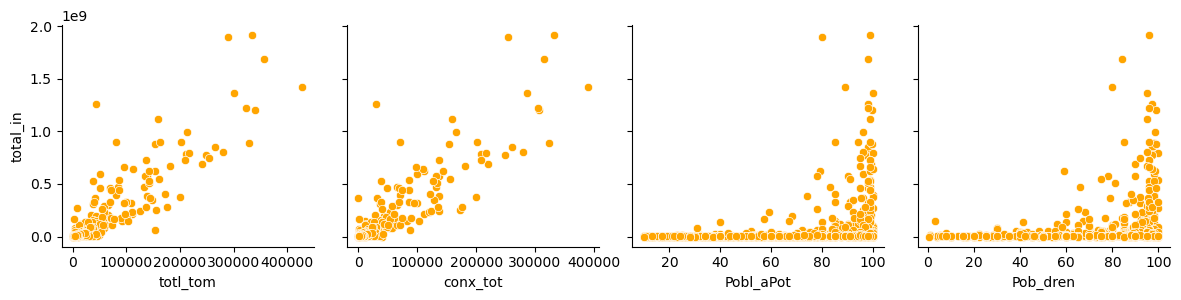

In [35]:
# Visualización de los datos originales
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")  # Suprimir advertencias específicas

Col_Var_x1 =['totl_tom', 'conx_tot','Pobl_aPot','Pob_dren'] #'ext_sani_km','ext_co_km'
Col_Var_y =['total_in']

g = sns.pairplot(df_Analisys1, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=3, plot_kws={'color': 'orange'})

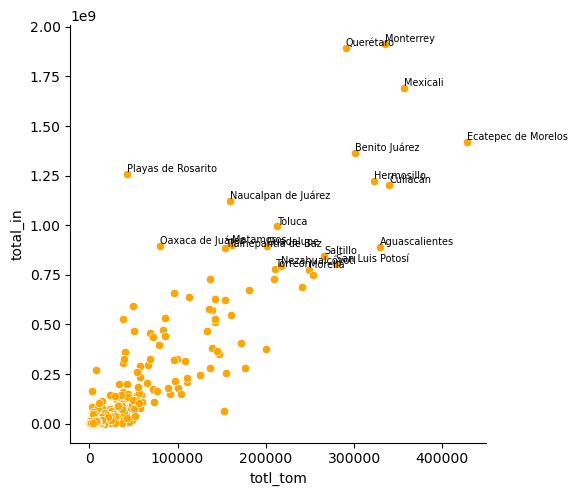

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Definir las columnas para las variables
Col_Var_x1 = ['totl_tom']
Col_Var_y = ['total_in']

# Crear la gráfica con seaborn pairplot
g = sns.pairplot(df_Analisys1, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=5, plot_kws={'color': 'orange'})

# Identificar los 20 valores más altos en 'total_in'
top_20_indices = df_Analisys1['total_in'].nlargest(20).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'total_in'
        for idx in top_20_indices:
            row = df_Analisys1.loc[idx]
            ax.text(
                row[x_var], 
                row[y_var], 
                row['Name_Mun'], 
                fontsize=7, 
                ha='left', 
                va='bottom'
            )

# Mostrar la gráfica
plt.show()


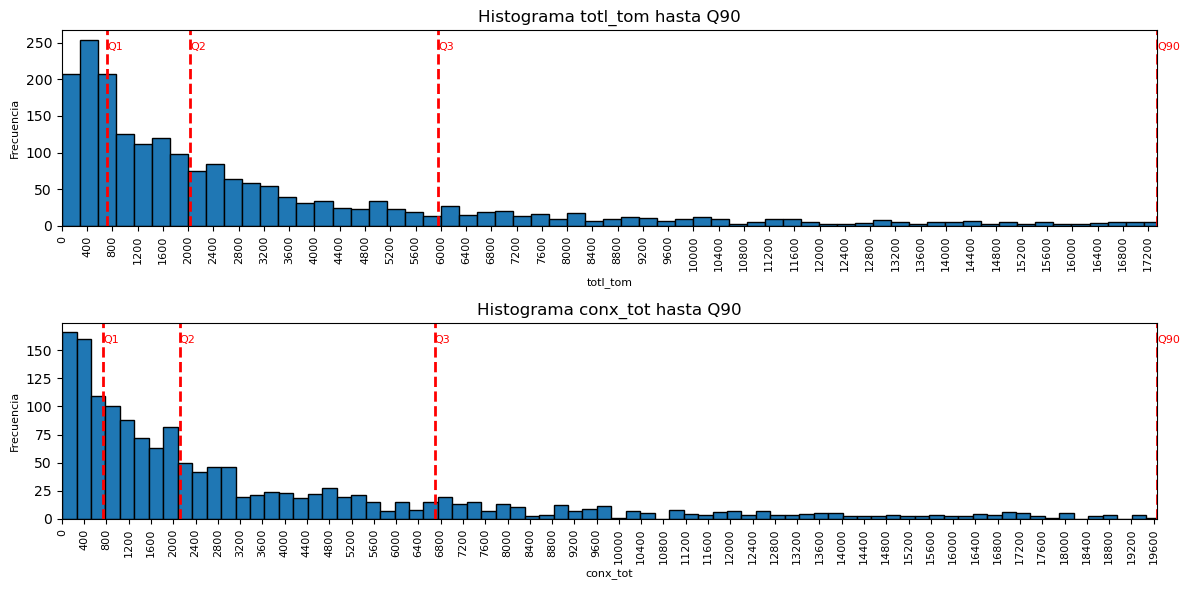

In [37]:
import matplotlib.pyplot as plt

# Lista de variables
variables = ['totl_tom','conx_tot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 8
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo manualmente
intervalo_x = 400  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]
    
    # Calcular los cuantiles
    Q1 = df_Analisys1[var].quantile(0.25)
    Q2 = df_Analisys1[var].quantile(0.50)
    Q3 = df_Analisys1[var].quantile(0.75)
    Qx = df_Analisys1[var].quantile(0.90)
    
    numero = 50
    if var in ["totl_tom", "conx_tot"]:
        numero = 1500
    elif var == "total_in":
        numero = 1800
    
    # Generar el histograma
    ax.hist(df_Analisys1[var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    
    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)
    
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

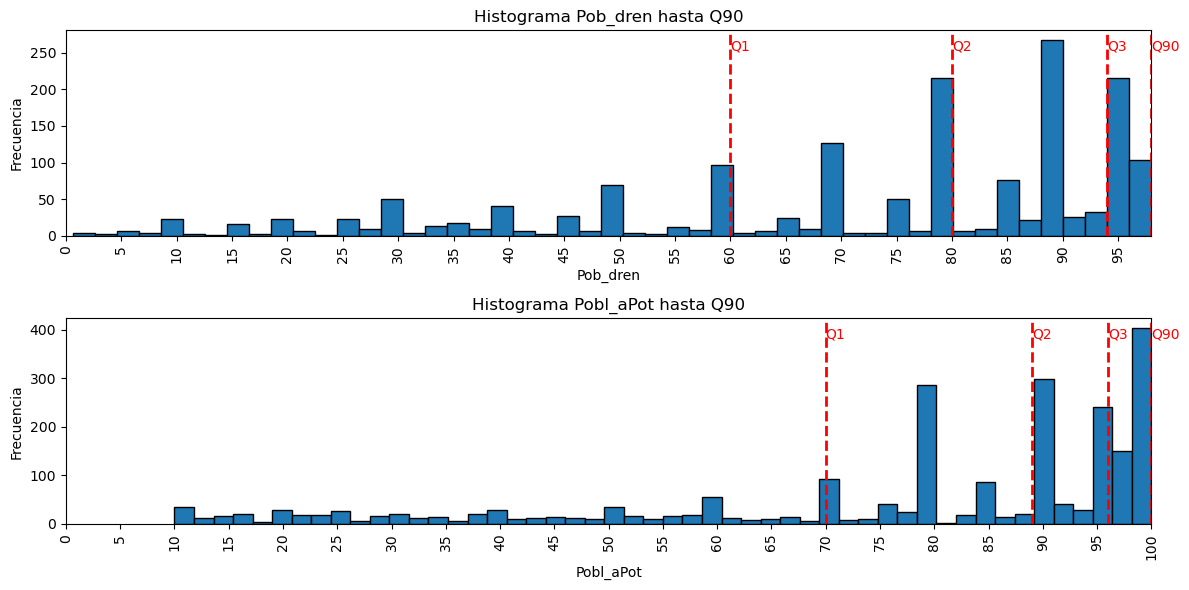

<Figure size 640x480 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt

# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 10  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo manualmente
intervalo_x = 5  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]
    
    # Calcular los cuantiles
    Q1 = df_Analisys1[var].quantile(0.25)
    Q2 = df_Analisys1[var].quantile(0.50)
    Q3 = df_Analisys1[var].quantile(0.75)
    Qx = df_Analisys1[var].quantile(0.90)
    
    numero = 50

    # Generar el histograma
    ax.hist(df_Analisys1[var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    
    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)
    
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()
plt.savefig('histograma_variable.png')

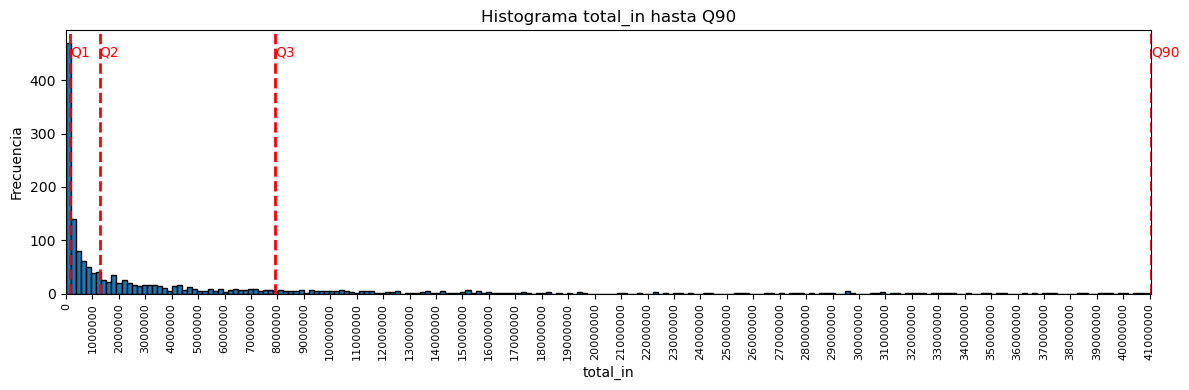

In [39]:
import matplotlib.pyplot as plt
# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot','total_in']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

selected_var = 'total_in'  # Cambia esta variable al nombre de la variable que deseas graficar

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 4))

# Definir el intervalo manualmente
intervalo_x = 1000000  # Cambia este valor según sea necesario

# Seleccionar la variable deseada
if selected_var in variables:
    # Calcular los cuantiles
    Q1 = df_Analisys1[selected_var].quantile(0.25)
    Q2 = df_Analisys1[selected_var].quantile(0.50)
    Q3 = df_Analisys1[selected_var].quantile(0.75)
    Qx = df_Analisys1[selected_var].quantile(0.90)
    
    numero = 10000

    # Generar el histograma
    ax.hist(df_Analisys1[selected_var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {selected_var} hasta Q90')
    ax.set_xlabel(selected_var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    
    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)
    
    # Ajustar el layout para evitar solapamientos
    plt.tight_layout()
    
    # Guardar la gráfica en formato PNG
    plt.savefig('histograma_variable.png')
    
    # Mostrar la gráfica
    plt.show()
else:
    print(f'Variable {selected_var} no encontrada en la lista de variables.')


### **2.6 Imputación de valores**

In [40]:
### Imputar valores de "conx_tot" en función de "totl_tom"

for i in df_Analisys1["totl_tom"]:
    if i<=800:
        df_Analisys1["conx_tot"].fillna(380,inplace=True)
    if 800<i<=1200:
        df_Analisys1["conx_tot"].fillna(1000,inplace=True)   
    if 1200<i<=2000:
        df_Analisys1["conx_tot"].fillna(1400,inplace=True)          
    if 2000<i<=2800:
        df_Analisys1["conx_tot"].fillna(2300,inplace=True)
    if 2800<i<=4000:
        df_Analisys1["conx_tot"].fillna(3400,inplace=True)   
    if 4000<i<=5500:
        df_Analisys1["conx_tot"].fillna(4400,inplace=True)   
    if 5500<i<=7800:
        df_Analisys1["conx_tot"].fillna(5600,inplace=True)                                           
    if 7800<i<=12000:
        df_Analisys1["conx_tot"].fillna(8800,inplace=True)                                           
    if i > 12000:
        df_Analisys1.loc[df_Analisys1["conx_tot"].isna(), "conx_tot"] = (1.1129 * (df_Analisys1["totl_tom"] - 12000) + 12000+1360)       

df_Analisys1["conx_tot"].fillna(df_Analisys1["conx_tot"].dropna().median(),inplace=True)

In [41]:
### Imputar valores de "totl_tom" en función de "conx_tot"   

for i in df_Analisys1["conx_tot"]:
    if i<=800:
        df_Analisys1["totl_tom"].fillna(400,inplace=True)
    if 800<i<=2000:
        df_Analisys1["totl_tom"].fillna(12400,inplace=True)      
    if 2000<i<=3200:
        df_Analisys1["totl_tom"].fillna(2400,inplace=True)
    if 3200<i<=4400:
        df_Analisys1["totl_tom"].fillna(3600,inplace=True)   
    if 4400<i<=5500:
        df_Analisys1["totl_tom"].fillna(4400,inplace=True)   
    if 5500<i<=7500:
        df_Analisys1["totl_tom"].fillna(5600,inplace=True)                                           
    if 7500<i<=10000:
        df_Analisys1["totl_tom"].fillna(7600,inplace=True)   
    if 10000<i<=12800:
        df_Analisys1["totl_tom"].fillna(10000,inplace=True)           
    if 12800<i<=15600:
        df_Analisys1["totl_tom"].fillna(12800,inplace=True)           
    if 15600<i<=24000:
        df_Analisys1["totl_tom"].fillna(15600,inplace=True) 
    if i > 24000:    
        df_Analisys1.loc[df_Analisys1["totl_tom"].isna(), "totl_tom"] = (1.1129 * (df_Analisys1["conx_tot"] - 24000) + 24000+2710)   
            
df_Analisys1["totl_tom"].fillna(df_Analisys1["totl_tom"].dropna().median(),inplace=True)

In [42]:
#Imputar valores
#df_Analisys1["totl_tom"].fillna(df_Analisys1["totl_tom"].dropna().median(),inplace=True)
#df_Analisys1["conx_tot"].fillna(df_Analisys1["conx_tot"].dropna().median(),inplace=True)
#df_Analisys1["ext_sani_km"].fillna(df_Analisys1["ext_sani_km"].dropna().median(),inplace=True)
#df_Analisys1["ext_co_km"].fillna(df_Analisys1["ext_co_km"].dropna().median(),inplace=True)
df_Analisys1["Pob_dren"].fillna(df_Analisys1["Pob_dren"].dropna().median(),inplace=True)
df_Analisys1["Pobl_aPot"].fillna(df_Analisys1["Pobl_aPot"].dropna().median(),inplace=True)
df_Analisys1["total_in"].fillna(df_Analisys1["total_in"].dropna().median(),inplace=True)

"""
# Eliminar filas que contienen valores nulos
print(df_Analisys1.shape)
df_Analisys1 = df_Analisys1.dropna()
print(df_Analisys1.shape)
"""

'\n# Eliminar filas que contienen valores nulos\nprint(df_Analisys1.shape)\ndf_Analisys1 = df_Analisys1.dropna()\nprint(df_Analisys1.shape)\n'

In [43]:
df_Analisys1.describe().T

,count,mean,std,min,25%,50%,75%,max
totl_tom,"2,394.000","9,619.802","30,878.242",4.000,753.250,"2,147.500","5,527.500","428,144.000"
conx_tot,"2,394.000","8,837.775","29,300.103",4.000,600.000,"1,859.000","4,869.250","389,221.000"
Pob_dren,"2,394.000",75.524,21.514,0.600,70.000,80.000,90.000,100.000
Pobl_aPot,"2,394.000",77.642,24.645,10.000,70.000,89.000,95.000,100.000
total_in,"2,394.000","25,314,140.609","125,935,838.495",321.000,"365,280.000","1,271,509.000","3,755,738.155","1,913,074,128.970"


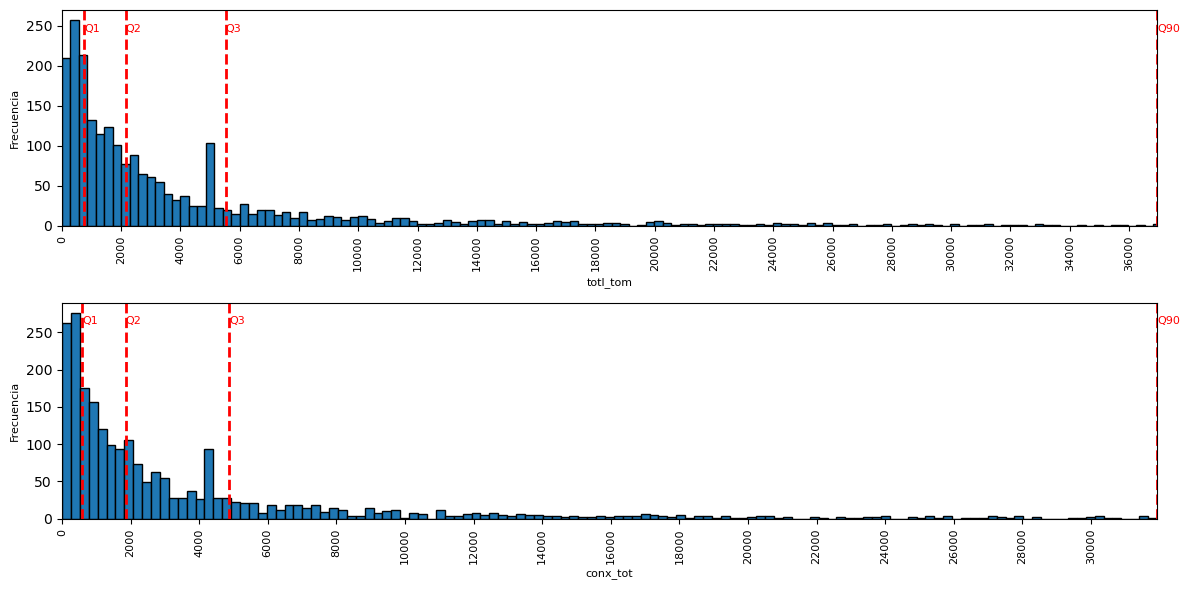

In [44]:
import matplotlib.pyplot as plt

# Lista de variables
variables = ['totl_tom','conx_tot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 8
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo texto ejes
intervalo_x = 2000  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]
    
    # Calcular los cuantiles
    Q1 = df_Analisys1[var].quantile(0.25)
    Q2 = df_Analisys1[var].quantile(0.50)
    Q3 = df_Analisys1[var].quantile(0.75)
    Qx = df_Analisys1[var].quantile(.95)
    
    numero = 1500
    # Generar el histograma
    ax.hist(df_Analisys1[var], bins=numero, edgecolor='black')
    ax.set_xlim(Q3, Qx)
    #ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    
    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)
    
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

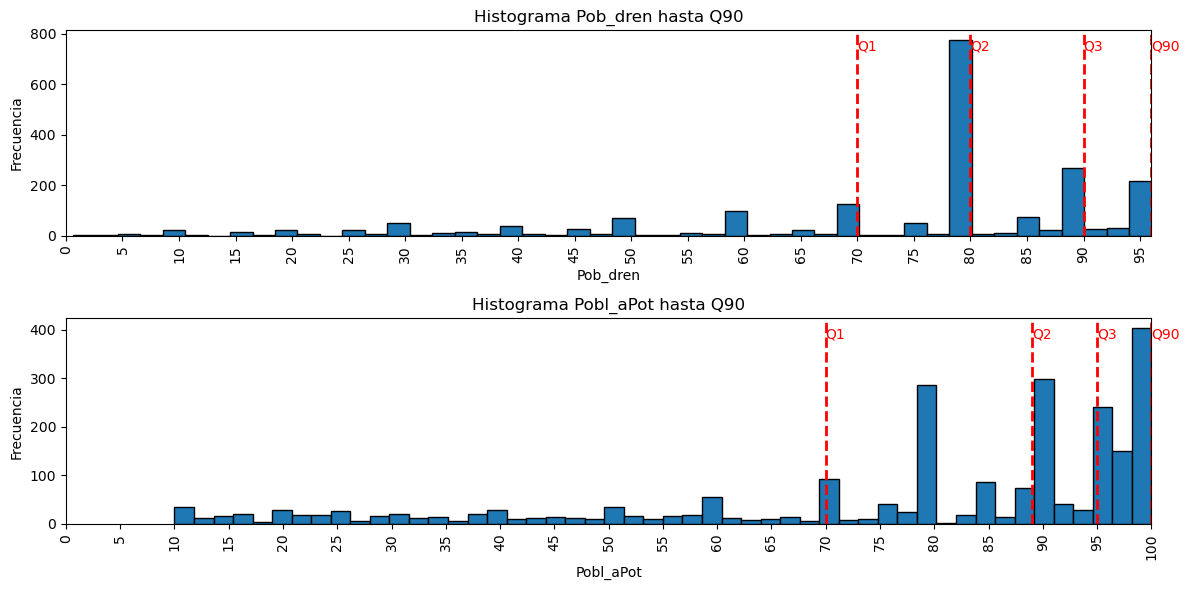

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt

# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 10  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo manualmente
intervalo_x = 5  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]
    
    # Calcular los cuantiles
    Q1 = df_Analisys1[var].quantile(0.25)
    Q2 = df_Analisys1[var].quantile(0.50)
    Q3 = df_Analisys1[var].quantile(0.75)
    Qx = df_Analisys1[var].quantile(0.90)
    
    numero = 50

    # Generar el histograma
    ax.hist(df_Analisys1[var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    
    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)
    
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()
plt.savefig('histograma_variable.png')

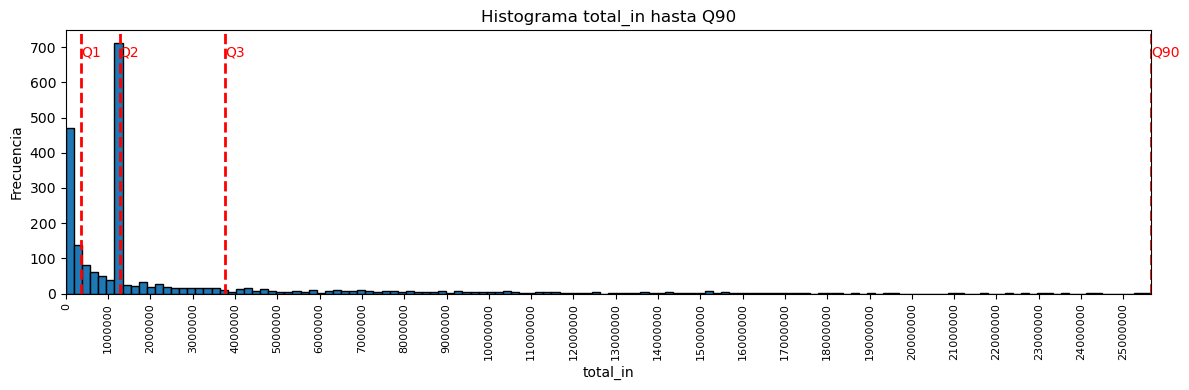

In [46]:
import matplotlib.pyplot as plt
# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot','total_in']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

selected_var = 'total_in'  # Cambia esta variable al nombre de la variable que deseas graficar

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 4))

# Definir el intervalo manualmente
intervalo_x = 1000000  # Cambia este valor según sea necesario

# Seleccionar la variable deseada
if selected_var in variables:
    # Calcular los cuantiles
    Q1 = df_Analisys1[selected_var].quantile(0.25)
    Q2 = df_Analisys1[selected_var].quantile(0.50)
    Q3 = df_Analisys1[selected_var].quantile(0.75)
    Qx = df_Analisys1[selected_var].quantile(0.90)
    
    numero = 10000

    # Generar el histograma
    ax.hist(df_Analisys1[selected_var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {selected_var} hasta Q90')
    ax.set_xlabel(selected_var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    
    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)
    
    # Ajustar el layout para evitar solapamientos
    plt.tight_layout()
    
    # Guardar la gráfica en formato PNG
    plt.savefig('histograma_variable.png')
    
    # Mostrar la gráfica
    plt.show()
else:
    print(f'Variable {selected_var} no encontrada en la lista de variables.')

### **2.6 Visualización de datos (datos Imputados)**

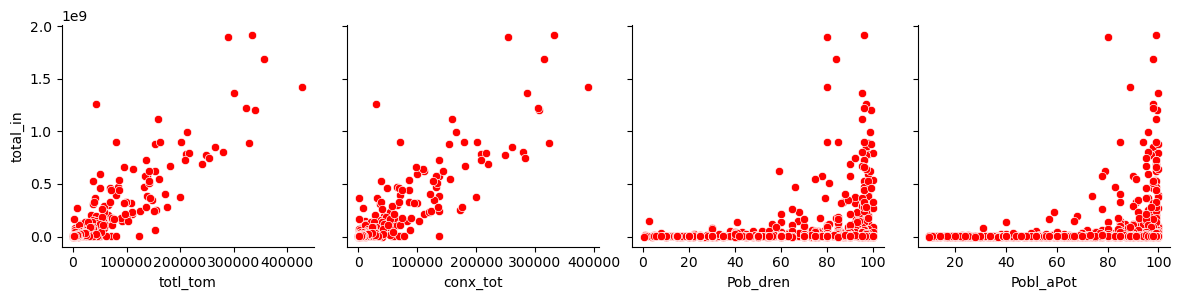

In [47]:
# Visualización de los datos
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")  # Suprimir advertencias específicas

Col_Var_x1 =['totl_tom', 'conx_tot','Pob_dren', 'Pobl_aPot']   #'ext_sani_km','ext_co_km',
Col_Var_y =['total_in']

g = sns.pairplot(df_Analisys1, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=3, plot_kws={'color': 'red'})

# **3. Análisis de correlaciones**  
_____

### **3.1 Matriz de correlacions**

In [48]:
df_Analisys1_Num= df_Analisys1[['totl_tom', 'conx_tot',              #'ext_sani_km', 'ext_co_km',
                     'Pob_dren', 'Pobl_aPot','total_in']]
# 1) Cálculo de las correlaciones pareadas en forma de tabla y en una imagen
correlation_matrix = df_Analisys1_Num.corr()

correlation_matrix


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
totl_tom,1.000,0.986,0.139,0.154,0.899
conx_tot,0.986,1.000,0.152,0.149,0.892
Pob_dren,0.139,0.152,1.000,0.361,0.124
Pobl_aPot,0.154,0.149,0.361,1.000,0.124
total_in,0.899,0.892,0.124,0.124,1.000


### **3.2 Mapa de calor de las correlaciones**

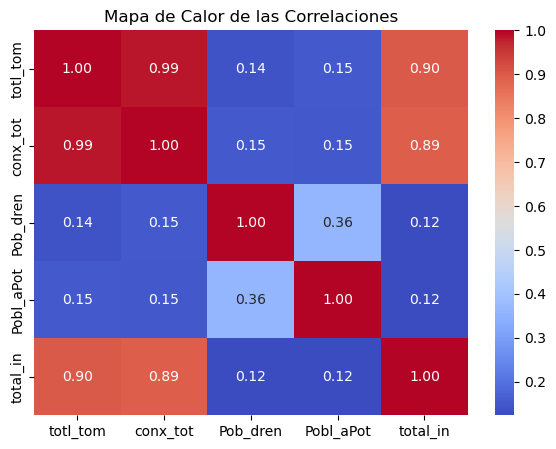

In [49]:

# Mapa de calor de las correlaciones
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de las Correlaciones')
plt.show()

# **4. Pre procesamiento**  
_____

In [50]:
# Revisión de valores nulos nuevamente
df_Analisys1.isnull().sum()

totl_tom     0
conx_tot     0
Pob_dren     0
Pobl_aPot    0
total_in     0
folio        0
cve_ent      0
Name_Ent     0
Name_Mun     0
dtype: int64

In [51]:
df_Analisys1.count()

totl_tom     2394
conx_tot     2394
Pob_dren     2394
Pobl_aPot    2394
total_in     2394
folio        2394
cve_ent      2394
Name_Ent     2394
Name_Mun     2394
dtype: int64

#### **4.1 Estandarización**

In [52]:
df_clasif = df_Analisys1.iloc[:, [0,1,2,3,4]].copy() #,5,6

SSscaler = StandardScaler()
X_scaled= SSscaler.fit_transform(df_clasif)

#MMscaler =  MinMaxScaler()
#X_train_MMS = MMscaler.fit_transform(X_train)
#X_test_MMS  = MMscaler.transform(X_test)

# **5. Modelos de clasificación**  
_____

### **5.1 Segmentación con DBScan**

In [53]:
warnings.filterwarnings("ignore")   # Ignorar todos los warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Ignorar solo los UserWarnings específicos

# Definir una función de métrica personalizada para silhouette score
def silhouette_scorer(estimator, X):
    estimator.fit(X)
    labels = estimator.labels_
    score = silhouette_score(X, labels)
    return score

# Supongamos que X_scaled contiene tus datos escalados    
##################################################### 5.5 y 5.... encuentra 3 clusters

# Definimos los parámetros epsilon y min_samples que queremos probar
param_grid = {
    'eps': [0.1,  1.0, 2.0,3.0, 4.0, 5.0,6,7,7.25,7.5,7.75,8,8.5,9,9.5,10,25,50],
    'min_samples': [2,3,5,6,7,8,9, 10,20,30,40,100,200,500]
}

# Creamos el modelo DBSCAN
dbscan = DBSCAN()

# Creamos un objeto GridSearchCV utilizando la función de métrica personalizada
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(X_scaled)

# Mejores parámetros encontrados
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Creamos el modelo DBSCAN con los mejores parámetros encontrados
best_eps = best_params['eps']
best_min_samples = best_params['min_samples']
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

# Ajustamos el modelo DBSCAN a los datos con los mejores parámetros
best_dbscan.fit(X_scaled)
best_labels = best_dbscan.labels_

# Número de clusters encontrados por DBSCAN (ignorando el ruido, si hay)
best_n_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
print(f'Número de clusters encontrados por DBSCAN: {best_n_clusters}')


Best Parameters: {'eps': 7, 'min_samples': 40}
Número de clusters encontrados por DBSCAN: 1


In [54]:
dbscan_labels = best_dbscan.labels_

Text(0.5, 1.0, 'DBScan (Silhouette: 0.92)')

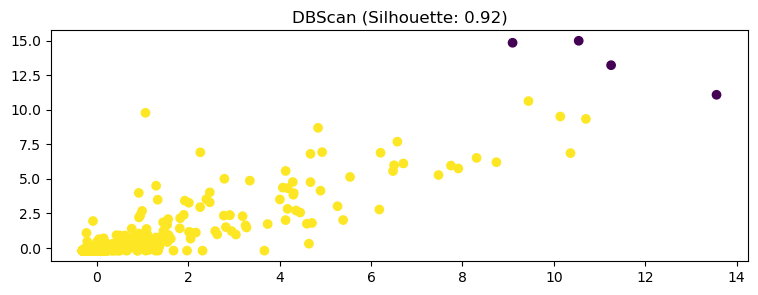

In [55]:
DBScan_clus = best_dbscan.fit_predict(X_scaled)
#DBScan_best_silhouette = silhouette_scorer(X_scaled, DBScan_clus )
#print(f'DBScan Clustering Silhouette Score: {DBScan_best_silhouette:.2f}')

################################################################  Visualizar los clusters
# DBScan
plt.figure(figsize=(9, 3))
plt.scatter(X_scaled[:, 0], X_scaled[:, 4], c=dbscan_labels, cmap='viridis')
plt.title(f'DBScan (Silhouette: {DBScan_best_silhouette :.2f})')

################################################################  Visualizar los clusters


In [56]:
df_Analisys1["cluster_db"]=dbscan_labels
df_Analisys1["cluster_db"].value_counts()   
df_Analisys1[df_Analisys1["cluster_db"]==-1]

,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,folio,cve_ent,Name_Ent,Name_Mun,cluster_db
12,"356,964.000","315,632.000",84.000,98.000,"1,690,761,382.000",2002,2,Baja California,Mexicali,-1
696,"428,144.000","389,221.000",80.000,89.000,"1,420,984,395.000",15033,15,Estado de México,Ecatepec de Morelos,-1
996,"335,097.000","331,865.000",96.000,99.000,"1,913,074,128.970",19039,19,Nuevo León,Monterrey,-1
1809,"290,449.000","254,564.000",80.000,80.000,"1,895,036,863.000",22014,22,Querétaro,Querétaro,-1


In [57]:
df_Analisys1["cluster_db"].value_counts()   

cluster_db
 0    2390
-1       4
Name: count, dtype: int64

Valores eliminados  15013,21140,26026,26048,28040,30193

### **5.2 Segmentación con KMeans y  Hierarchical**

In [58]:
##### Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')

K-Means Silhouette Score: 0.51


In [59]:
################################################################# Aplicar Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}')

Hierarchical Clustering Silhouette Score: 0.50


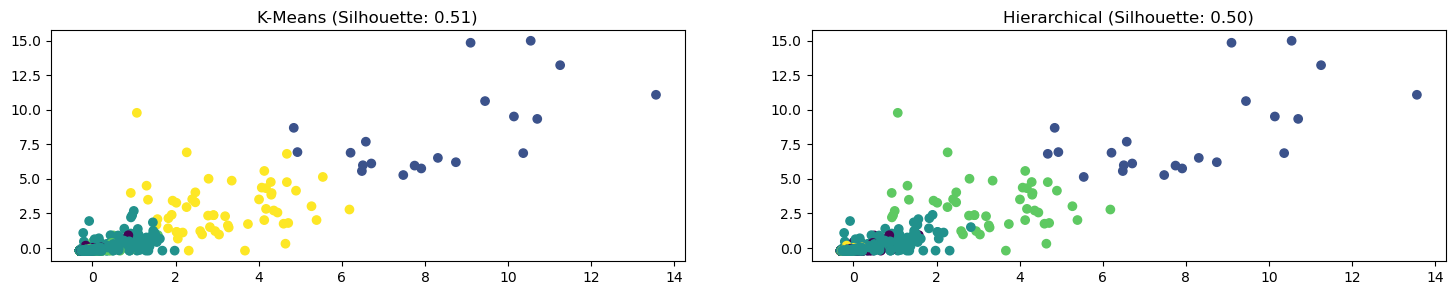

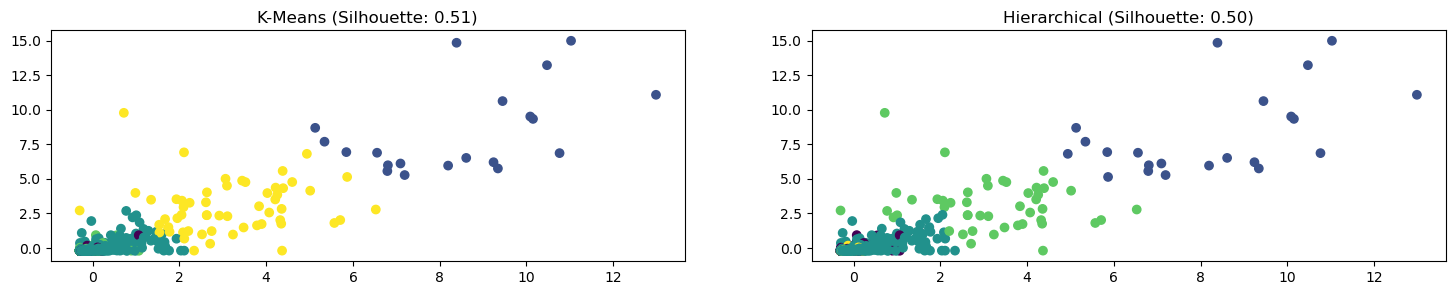

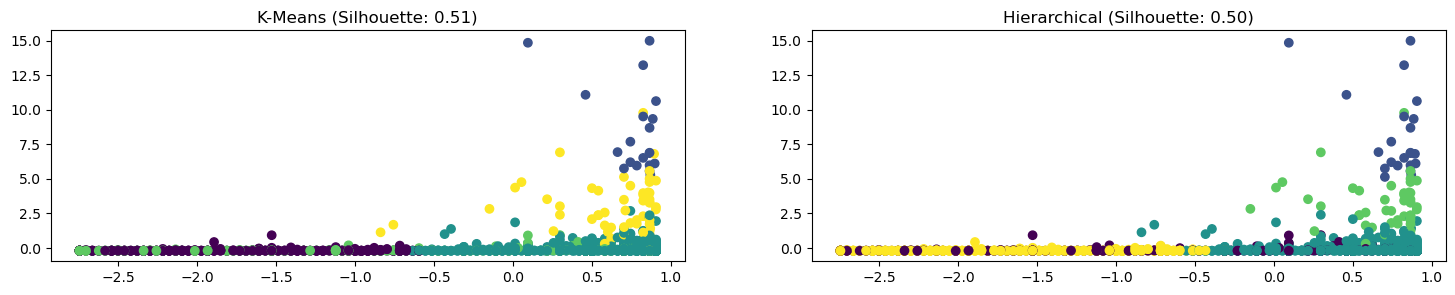

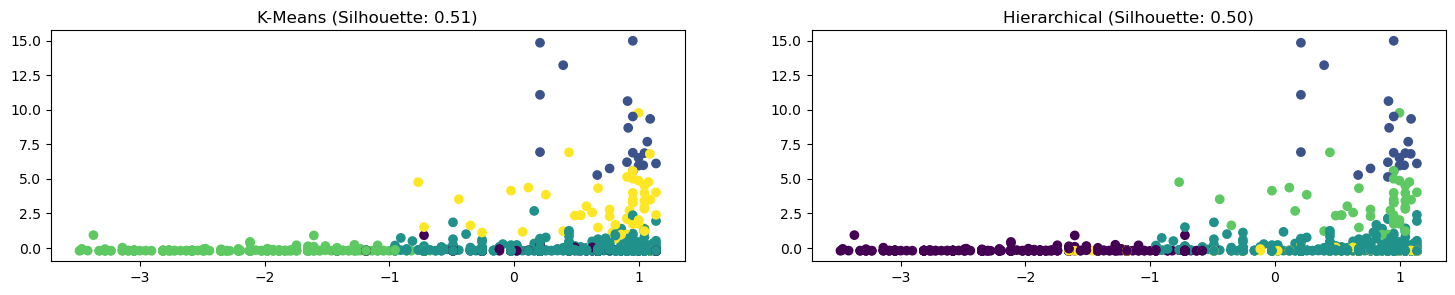

In [60]:
#################################################################  Visualizar los clusters

fig, axs = plt.subplots(1, 2, figsize=(18, 3))

# K-Means
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 4], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-Means (Silhouette: {kmeans_silhouette:.2f})')

# Hierarchical Clustering
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 4], c=hierarchical_labels, cmap='viridis')
axs[1].set_title(f'Hierarchical (Silhouette: {hierarchical_silhouette:.2f})')


fig, axs = plt.subplots(1, 2, figsize=(18, 3))

# K-Means
axs[0].scatter(X_scaled[:, 1], X_scaled[:, 4], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-Means (Silhouette: {kmeans_silhouette:.2f})')

# Hierarchical Clustering
axs[1].scatter(X_scaled[:, 1], X_scaled[:, 4], c=hierarchical_labels, cmap='viridis')
axs[1].set_title(f'Hierarchical (Silhouette: {hierarchical_silhouette:.2f})')


fig, axs = plt.subplots(1, 2, figsize=(18, 3))

# K-Means
axs[0].scatter(X_scaled[:, 3], X_scaled[:, 4], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-Means (Silhouette: {kmeans_silhouette:.2f})')

# Hierarchical Clustering
axs[1].scatter(X_scaled[:, 3], X_scaled[:, 4], c=hierarchical_labels, cmap='viridis')
axs[1].set_title(f'Hierarchical (Silhouette: {hierarchical_silhouette:.2f})')

fig, axs = plt.subplots(1, 2, figsize=(18, 3))

# K-Means
axs[0].scatter(X_scaled[:, 2], X_scaled[:, 4], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-Means (Silhouette: {kmeans_silhouette:.2f})')

# Hierarchical Clustering
axs[1].scatter(X_scaled[:,2], X_scaled[:, 4], c=hierarchical_labels, cmap='viridis')
axs[1].set_title(f'Hierarchical (Silhouette: {hierarchical_silhouette:.2f})')

plt.show()

#### **5.2.1 KMeans y hierarchical Selección número cluster**

Clusters: 2, Silhouette Score: 0.78
Clusters: 3, Silhouette Score: 0.45
Clusters: 4, Silhouette Score: 0.46
Clusters: 5, Silhouette Score: 0.50
Clusters: 6, Silhouette Score: 0.50
Clusters: 7, Silhouette Score: 0.49
Clusters: 8, Silhouette Score: 0.49

Mejor número de clusters: 2, con Silhouette Score: 0.78


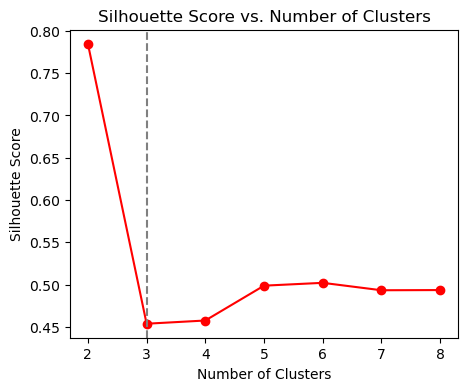

In [61]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Supongamos que X_scaled ya está definido

# Rango de clusters para probar
num_clusters = [2, 3, 4, 5,6,7,8]
best_score = -1
best_k = None
silhouette_scores = []

# Evaluar cada número de clusters
for k in num_clusters:
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f'Clusters: {k}, Silhouette Score: {score:.2f}')
    
    if score > best_score:
        best_score = score
        best_k = k

print(f'\nMejor número de clusters: {best_k}, con Silhouette Score: {best_score:.2f}')
    

# Graficar el puntaje de silueta
plt.figure(figsize=(5, 4))
plt.plot(num_clusters, silhouette_scores, marker='o',color='red')
plt.axvline(x=3,linestyle='dashed',color='gray')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.xticks(num_clusters)
#plt.grid(True)
plt.show()


Score silueta 0.510051962537227


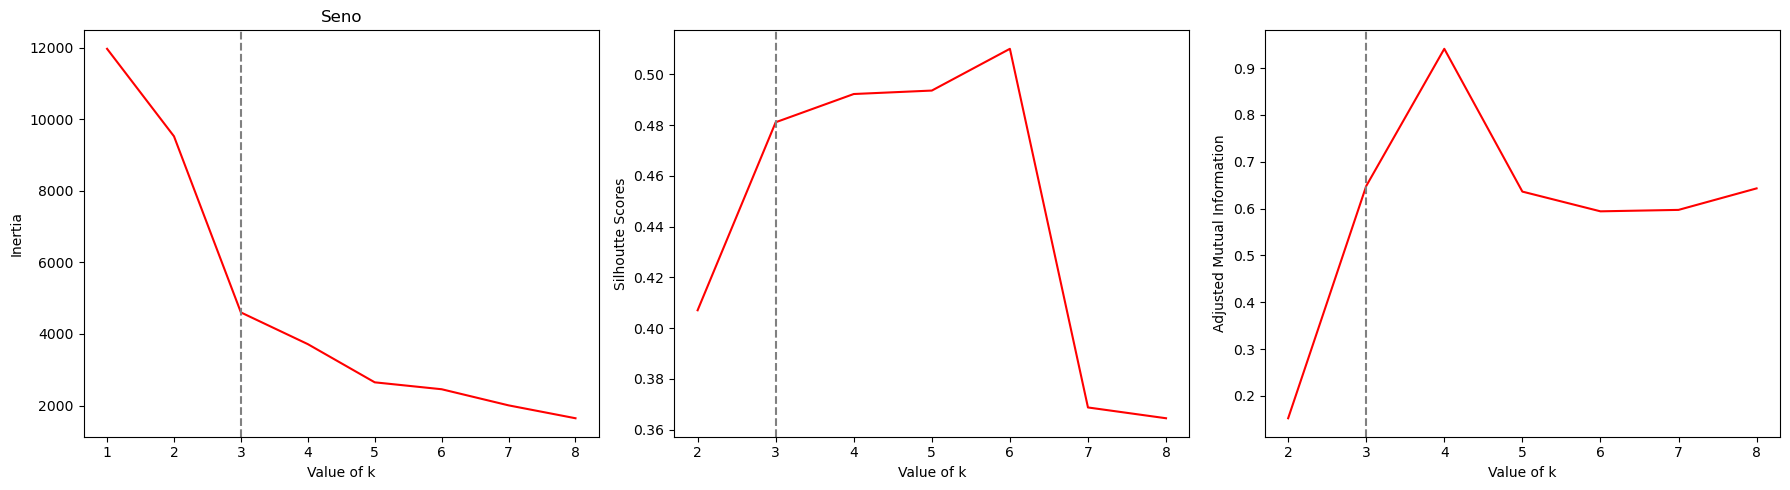

In [62]:
# Crear una figura y tres subplots en un renglón
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

y_clusters=kmeans.predict(X_scaled)
################################################### Gráfico 1
from sklearn.metrics import silhouette_score
max_num_clusters = 9
inertias = []
k_values = list(range(1,max_num_clusters))
for k in k_values:
    modelo = KMeans(n_clusters=k, n_init='auto')
    modelo.fit(X_scaled)
    inertias.append(modelo.inertia_)

axs[0].plot(k_values,inertias,color='red')
axs[0].axvline(x=3,linestyle='dashed',color='gray')
axs[0].set_title('Seno')
axs[0].set_xlabel("Value of k", fontsize=10)
axs[0].set_ylabel("Inertia", fontsize=10)
axs[0].set_xticks(k_values)

################################################### Gráfico 2
from sklearn.metrics import silhouette_score
max_num_clusters = 9

print("Score silueta",silhouette_score(X_scaled, y_clusters))

siluetas = []
k_values = list(range(2,max_num_clusters))
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(X_scaled)
    labels = kmeans.labels_
    siluetas.append(silhouette_score(X_scaled, labels, metric='euclidean'))

axs[1].plot(k_values,siluetas,color='red')
axs[1].axvline(x=3,linestyle='dashed',color='gray')
axs[1].set_xticks(k_values)
axs[1].set_ylabel("Silhoutte Scores", fontsize=10)
axs[1].set_xlabel("Value of k", fontsize=10)

################################################### Gráfico 3
from sklearn.metrics import adjusted_mutual_info_score
max_num_clusters = 9
scores = []
k_values = list(range(2,max_num_clusters))
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    scores.append(adjusted_mutual_info_score(y_clusters, labels))

axs[2].plot(k_values,scores,color='red')
axs[2].axvline(x=3,linestyle='dashed',color='gray')
axs[2].set_xticks(k_values)
axs[2].set_ylabel("Adjusted Mutual Information", fontsize=10)
axs[2].set_xlabel("Value of k", fontsize=10)

plt.tight_layout()
plt.show()


### **5.3 Clasificación con Hierarchical**

In [63]:
################################################################# Aplicar Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}')

hier_labels = hierarchical.fit_predict(X_scaled)        # Asignar etiquetas a los clusters
df_clasif["cluster_hier"]=hier_labels
df_clasif.head(5)

Hierarchical Clustering Silhouette Score: 0.50


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,cluster_hier
0,"329,552.000","324,115.000",98.000,99.000,"889,622,823.430",1
1,"14,473.000","13,738.000",80.000,70.000,"914,517.000",2
2,"16,871.000","19,288.000",98.000,99.000,"42,545,534.000",2
3,"4,333.000","4,333.000",98.000,98.000,"7,223,000.000",2
4,"35,095.000","34,851.000",96.000,98.000,"110,530,539.220",2


In [64]:
df_clasif["folio"]=df_Analisys1["folio"]
df_clasif["total_in"]=df_Analisys1["total_in"]
df_clasif["cve_ent"]=df_Analisys1["cve_ent"]
df_clasif["Name_Ent"]=df_Analisys1["Name_Ent"]
df_clasif["Name_Mun"]=df_Analisys1["Name_Mun"]
print(df_clasif.shape)
df_clasif.head(5)

(2394, 10)


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,cluster_hier,folio,cve_ent,Name_Ent,Name_Mun
0,"329,552.000","324,115.000",98.000,99.000,"889,622,823.430",1,1001,1,Aguascalientes,Aguascalientes
1,"14,473.000","13,738.000",80.000,70.000,"914,517.000",2,1002,1,Aguascalientes,Asientos
2,"16,871.000","19,288.000",98.000,99.000,"42,545,534.000",2,1003,1,Aguascalientes,Calvillo
3,"4,333.000","4,333.000",98.000,98.000,"7,223,000.000",2,1004,1,Aguascalientes,Cosío
4,"35,095.000","34,851.000",96.000,98.000,"110,530,539.220",2,1005,1,Aguascalientes,Jesús María


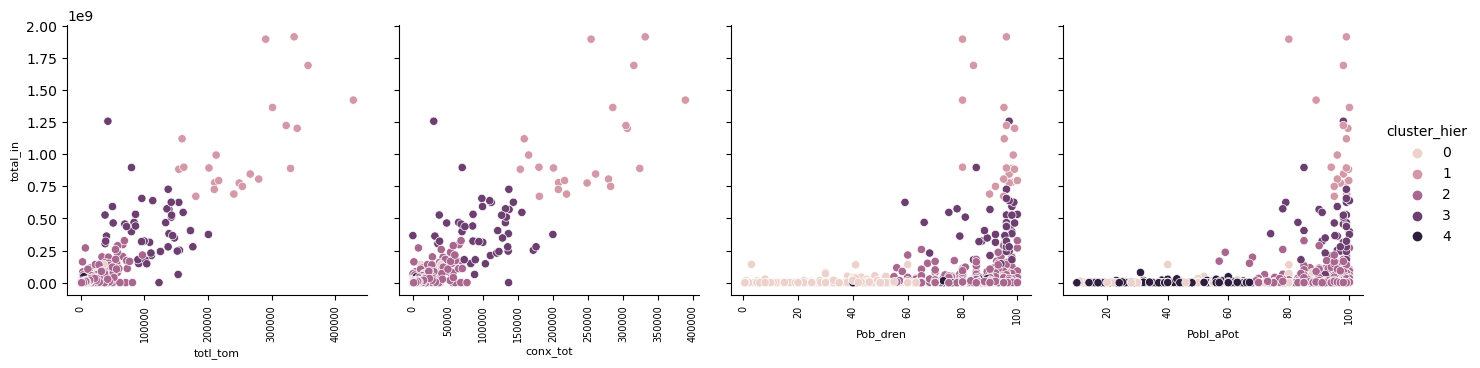

In [65]:
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
import seaborn as sns

Col_Var_x1 =['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot'] #'ext_sani_km', 'ext_co_km',
Col_Var_y =['total_in']

g = sns.pairplot(df_clasif, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=3.5,hue='cluster_hier')

# Ajustar el tamaño de la letra de los ejes
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)  # Cambia 8 al tamaño de fuente deseado
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Cambia 8 al tamaño de fuente deseado
    ax.tick_params(axis='x', labelrotation=90,labelsize=7)
    

In [66]:
df_clasif["cluster_hier"]
df_clasif["cluster_hier"].value_counts()  

cluster_hier
2    1513
0     458
4     354
3      47
1      22
Name: count, dtype: int64

### **5.4 Clasificación conKMeans**

In [67]:
################################################################# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')

df_clasif["cluster_Kmean"]=kmeans_labels
df_clasif.head(2)


K-Means Silhouette Score: 0.51


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,cluster_hier,folio,cve_ent,Name_Ent,Name_Mun,cluster_Kmean
0,"329,552.000","324,115.000",98.000,99.000,"889,622,823.430",1,1001,1,Aguascalientes,Aguascalientes,1
1,"14,473.000","13,738.000",80.000,70.000,"914,517.000",2,1002,1,Aguascalientes,Asientos,2


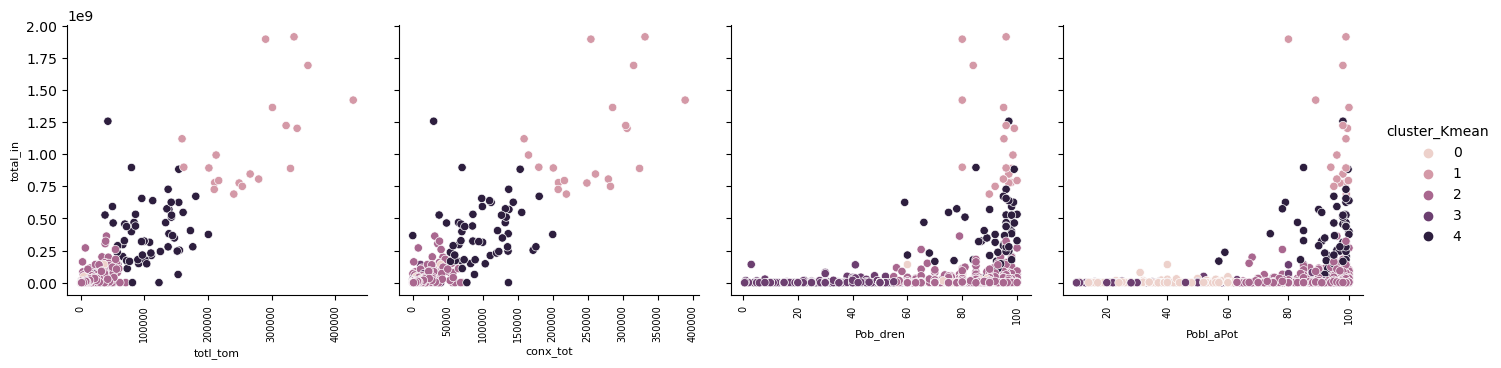

In [68]:
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
import seaborn as sns

Col_Var_x1 =['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot']  #'ext_sani_km', 'ext_co_km',
Col_Var_y =['total_in']

g = sns.pairplot(df_clasif, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=3.5,hue='cluster_Kmean')

# Ajustar el tamaño de la letra de los ejes
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)  # Cambia 8 al tamaño de fuente deseado
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Cambia 8 al tamaño de fuente deseado
    ax.tick_params(axis='x', labelrotation=90,labelsize=7)
    

In [69]:
df_clasif["cluster_Kmean"]
df_clasif["cluster_Kmean"].value_counts()  

cluster_Kmean
2    1571
3     399
0     347
4      57
1      20
Name: count, dtype: int64

In [70]:
#0 Pequeños    
df_clasif["cluster_Kmean"] = df_clasif["cluster_Kmean"].replace({1:"Clase 5",
                                                                 4:"Clase 4",
                                                                 2:"Clase 3",
                                                                 3:"Clase 2",
                                                                 0:"Clase 1"})

df_clasif["cluster_Kmean"].value_counts()  

#0 Pequeños    
"""                                                             {1:"Clase 5. Muy alta cobertura de agua pot. y alcantarillado ",
                                                                 4:"Clase 4. Alta cobertura de agua pot. y alcantarillado ",
                                                                 2:"Clase 3. Media cobertura de agua pot. y alcantarillado ",
                                                                 3:"Clase 2. Baja cobertura de agua pot. y alcantarillado ",
                                                                 0:"Clase 1. Muy baja cobertura de agua pot. y alcantarillado ",})
"""

'                                                             {1:"Clase 5. Muy alta cobertura de agua pot. y alcantarillado ",\n                                                                 4:"Clase 4. Alta cobertura de agua pot. y alcantarillado ",\n                                                                 2:"Clase 3. Media cobertura de agua pot. y alcantarillado ",\n                                                                 3:"Clase 2. Baja cobertura de agua pot. y alcantarillado ",\n                                                                 0:"Clase 1. Muy baja cobertura de agua pot. y alcantarillado ",})\n'

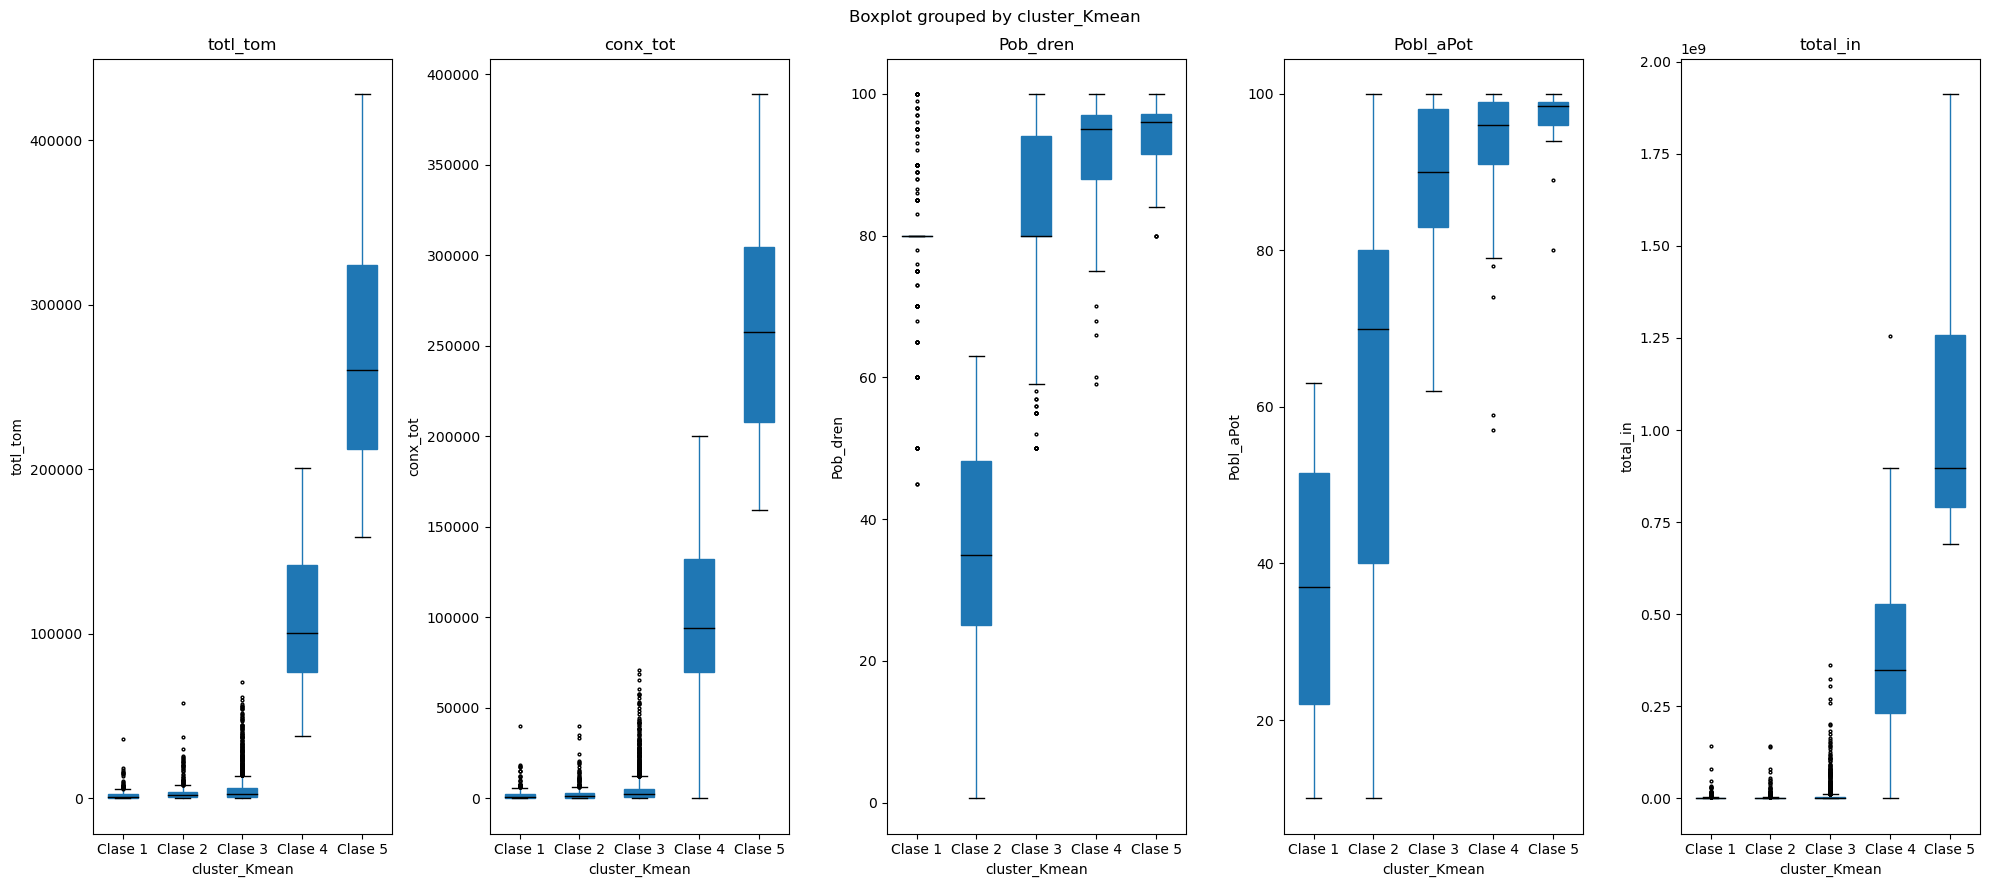

In [71]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los gráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 9), sharey=False)

# Iterar sobre las variables y crear los boxplots para cada una
variables = ['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', 'total_in']
for i, var in enumerate(variables):
    # Crear el boxplot para la variable var en el i-ésimo eje
    box = df_clasif.boxplot(
        column=var,
        by='cluster_Kmean',
        ax=axes[i],
        patch_artist=True,
        flierprops=dict(marker='o', color='gray', markersize=2)  # Personalización de los puntos (bolitas)
    )
    
    # Configuraciones adicionales
    for patch in box.artists:
        patch.set_facecolor('blue')
    
    # Cambiar el color de la línea de la mediana a negro
    for line in box.lines[4::6]:  # Las líneas de mediana están en estas posiciones
        line.set_color('black')
    
    axes[i].set_title(var)  # Título del gráfico
    axes[i].set_xlabel('cluster_Kmean')  # Etiqueta del eje x
    axes[i].set_ylabel(var)  # Etiqueta del eje y (variable)
    axes[i].grid(False)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [72]:
df_clasif["cluster_Kmean"]
df_clasif["cluster_Kmean"].value_counts()  

cluster_Kmean
Clase 3    1571
Clase 2     399
Clase 1     347
Clase 4      57
Clase 5      20
Name: count, dtype: int64

### **5.5 Caracterización de los Clusters**

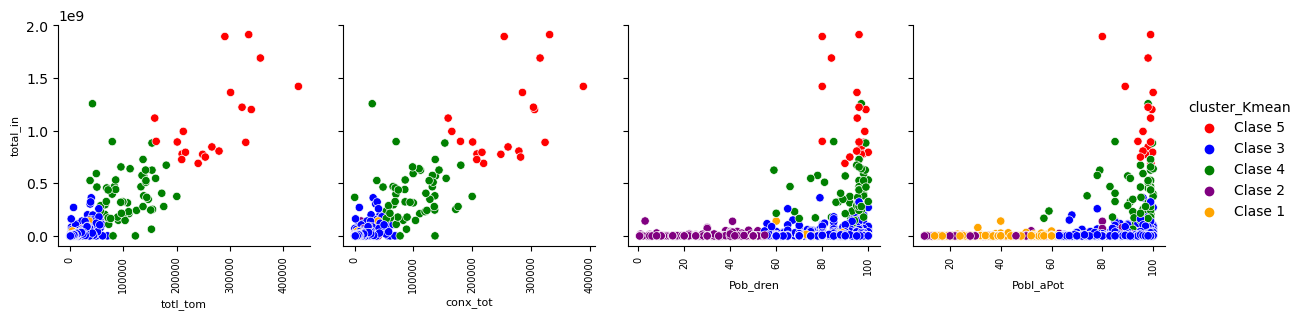

In [73]:
colors = ['red', 'blue', 'green', 'purple', 'orange']  

Col_Var_x1 = ['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot']  
Col_Var_y = ['total_in']

# Crear el pairplot con una paleta de colores personalizada
g = sns.pairplot(
    df_clasif, 
    x_vars=Col_Var_x1, 
    y_vars=Col_Var_y, 
    height=3, 
    hue='cluster_Kmean',
    palette=colors
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)

plt.show()


#### **5.5.1 Cluster Clase 5. Muy alta cobertura de agua pot. y alcantarillado**

In [74]:
df_clasif_5 = df_clasif[df_clasif['cluster_Kmean'] == "Clase 5"]
df_clasif_5.describe().T

,count,mean,std,min,25%,50%,75%,max
totl_tom,20.000,"268,229.100","69,984.273","159,115.000","212,089.750","259,987.500","324,366.500","428,144.000"
conx_tot,20.000,"257,065.522","61,816.588","159,115.000","208,119.250","257,824.000","304,789.500","389,221.000"
Pob_dren,20.000,93.124,6.661,80.000,91.468,96.000,97.200,100.000
Pobl_aPot,20.000,96.671,4.704,80.000,96.000,98.500,99.000,100.000
total_in,20.000,"1,083,648,154.624","387,682,696.940","689,929,731.810","791,167,595.438","896,004,707.675","1,258,350,764.348","1,913,074,128.970"
cluster_hier,20.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000


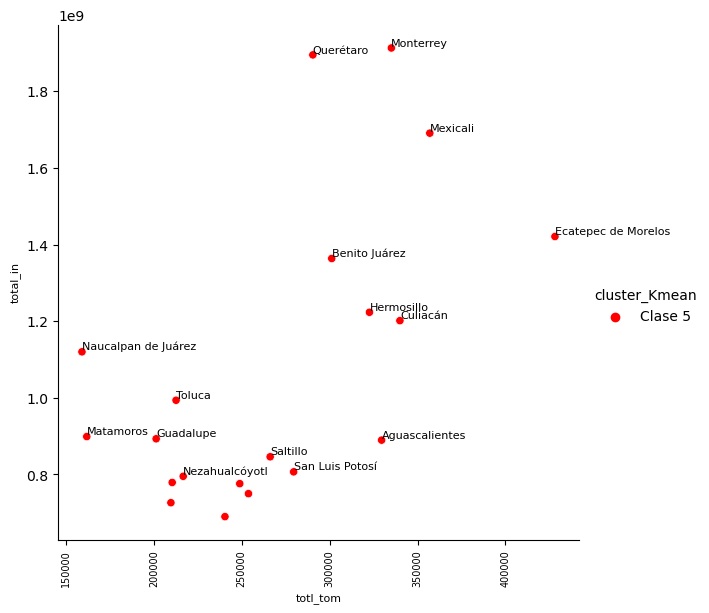

In [75]:
colors = ['red']  
Col_Var_y=["total_in"]
Col_Var_x1=["totl_tom"]

g = sns.pairplot(
    df_clasif_5, 
    x_vars=Col_Var_x1, 
    y_vars=Col_Var_y, 
    height=6, 
    hue='cluster_Kmean',
    palette=colors
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)

    
# Identificar los 20 valores más altos en 'total_in'
top_20_indices = df_clasif_5['total_in'].nlargest(15).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'total_in'
        for idx in top_20_indices:
            row = df_clasif_5.loc[idx]
            ax.text(
                row[x_var], 
                row[y_var], 
                row['Name_Mun'], 
                fontsize=8, 
                ha='left', 
                va='bottom'
            )

# Mostrar la gráfica
plt.show()

plt.show()

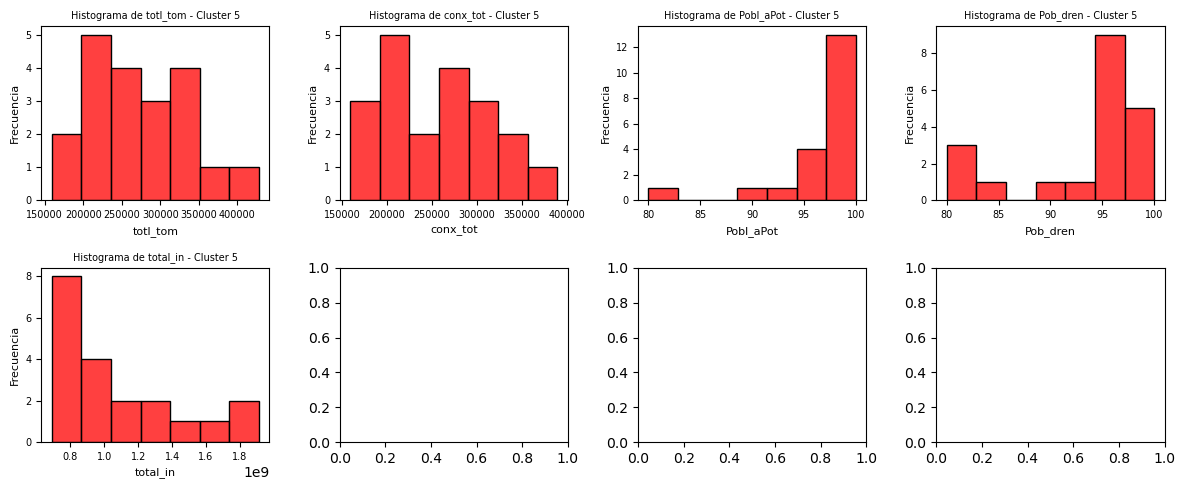

In [76]:
colors = ['red']  #['red', 'blue', 'green', 'purple', 'orange'] 

variables = ['totl_tom', 'conx_tot', 'Pobl_aPot','Pob_dren', 'total_in']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))  
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(df_clasif_5 [var], ax=axes[i], color=colors[0],bins=7) 
    axes[i].set_title(f'Histograma de {var} - Cluster 5', fontsize=7)
    axes[i].set_xlabel(var, fontsize=8)
    axes[i].set_ylabel('Frecuencia', fontsize=8)
    axes[i].tick_params(axis='x', labelsize=7)
    axes[i].tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

In [77]:
df_clasif_5.sort_values("total_in",ascending=False).head(10)[['folio','Name_Ent','Name_Mun','totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', "total_in"]]

,folio,Name_Ent,Name_Mun,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
996,19039,Nuevo León,Monterrey,"335,097.000","331,865.000",96.000,99.000,"1,913,074,128.970"
1809,22014,Querétaro,Querétaro,"290,449.000","254,564.000",80.000,80.000,"1,895,036,863.000"
12,2002,Baja California,Mexicali,"356,964.000","315,632.000",84.000,98.000,"1,690,761,382.000"
696,15033,Estado de México,Ecatepec de Morelos,"428,144.000","389,221.000",80.000,89.000,"1,420,984,395.000"
1818,23005,Quintana Roo,Benito Juárez,"301,185.000","285,618.000",95.100,100.000,"1,363,658,394.000"
1930,26030,Sonora,Hermosillo,"322,638.000","304,325.000",96.000,98.000,"1,223,248,221.130"
1888,25006,Sinaloa,Culiacán,"339,960.000","306,183.000",99.000,99.500,"1,201,402,177.000"
720,15057,Estado de México,Naucalpan de Juárez,"159,115.000","159,115.000",95.210,99.000,"1,120,061,885.170"
769,15106,Estado de México,Toluca,"212,640.000","165,409.000",98.500,96.000,"993,679,907.000"
2011,28022,Tamaulipas,Matamoros,"161,859.000","180,138.081",80.000,94.000,"898,915,604.000"


#### **5.5.2 Cluster Clase 4. Alta cobertura de agua pot. y alcantarillado**

In [78]:
df_clasif_4 = df_clasif[df_clasif['cluster_Kmean'] == "Clase 4"]
df_clasif_4.describe().T

,count,mean,std,min,25%,50%,75%,max
totl_tom,57.000,"108,525.258","39,279.414","38,063.000","76,602.000","100,736.000","142,048.000","200,470.000"
conx_tot,57.000,"99,790.023","40,786.046",74.000,"69,862.000","94,363.000","132,397.000","200,040.000"
Pob_dren,57.000,90.703,10.095,59.000,88.000,95.000,97.000,100.000
Pobl_aPot,57.000,93.058,9.094,57.000,91.000,96.000,99.000,100.000
total_in,57.000,"391,604,825.901","232,751,734.675","1,271,509.000","231,225,911.000","348,488,763.900","527,094,536.390","1,256,686,180.000"
cluster_hier,57.000,2.737,0.518,1.000,3.000,3.000,3.000,3.000


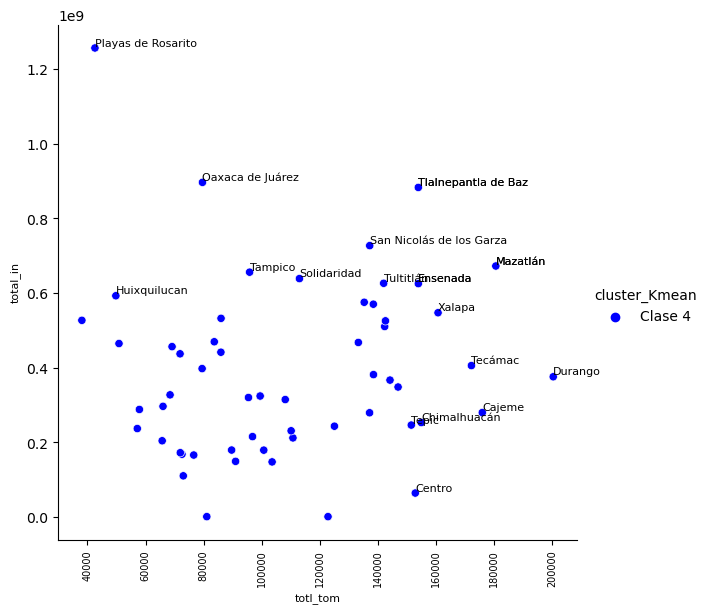

In [79]:
colors = ['blue']  
Col_Var_y=["total_in"]
Col_Var_x1=["totl_tom"]

g = sns.pairplot(
    df_clasif_4, 
    x_vars=Col_Var_x1, 
    y_vars=Col_Var_y, 
    height=6, 
    hue='cluster_Kmean',
    palette=colors
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)


top_20_indices = df_clasif_4['total_in'].nlargest(10).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'total_in'
        for idx in top_20_indices:
            row = df_clasif_4.loc[idx]
            ax.text(
                row[x_var], 
                row[y_var], 
                row['Name_Mun'], 
                fontsize=8, 
                ha='left', 
                va='bottom'
            )


top_20_indices2 = df_clasif_4['totl_tom'].nlargest(10).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'total_in'
        for idx in top_20_indices2:
            row = df_clasif_4.loc[idx]
            ax.text(
                row[x_var], 
                row[y_var], 
                row['Name_Mun'], 
                fontsize=8, 
                ha='left', 
                va='bottom'
            )
            


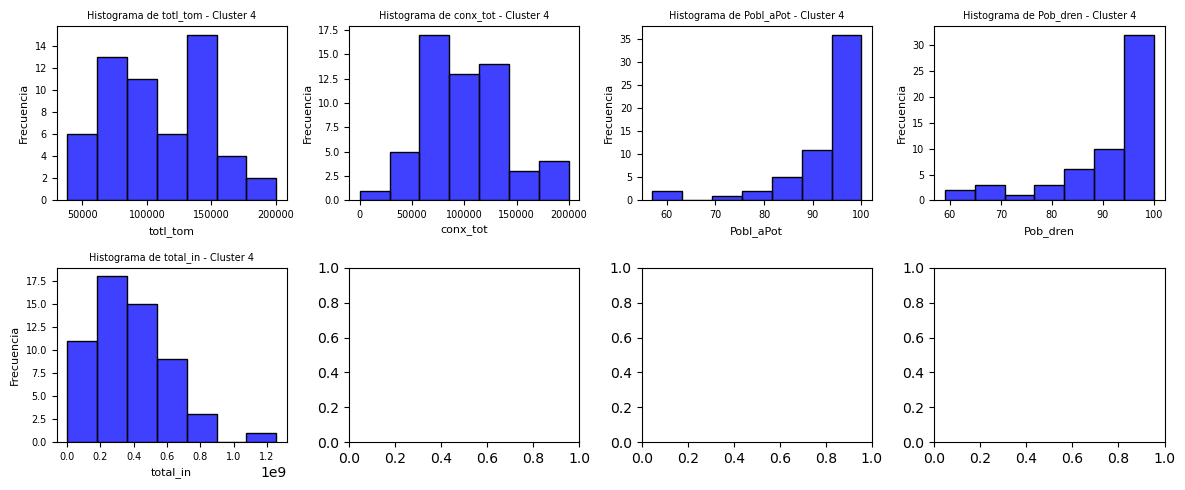

In [80]:
colors = ['red', 'blue', 'green', 'purple', 'orange'] 

variables = ['totl_tom', 'conx_tot', 'Pobl_aPot','Pob_dren', 'total_in']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))  
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(df_clasif_4 [var], ax=axes[i], color=colors[1], bins=7) 
    axes[i].set_title(f'Histograma de {var} - Cluster 4', fontsize=7)
    axes[i].set_xlabel(var, fontsize=8)
    axes[i].set_ylabel('Frecuencia', fontsize=8)
    axes[i].tick_params(axis='x', labelsize=7)
    axes[i].tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

In [81]:
df_clasif_4.sort_values("total_in",ascending=False).head(10)[['folio','Name_Ent','Name_Mun','totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', "total_in"]]

,folio,Name_Ent,Name_Mun,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
15,2005,Baja California,Playas de Rosarito,"42,564.000","29,911.000",97.000,98.000,"1,256,686,180.000"
1075,20067,Oaxaca,Oaxaca de Juárez,"79,612.000","70,535.000",85.000,85.000,"896,679,216.000"
767,15104,Estado de México,Tlalnepantla de Baz,"153,989.000","153,503.000",98.940,99.700,"883,097,708.220"
1003,19046,Nuevo León,San Nicolás de los Garza,"137,240.000","137,143.000",96.000,99.000,"727,234,555.470"
1894,25012,Sinaloa,Mazatlán,"180,693.000","180,693.000",95.000,95.000,"672,631,291.000"
2027,28038,Tamaulipas,Tampico,"95,853.000","98,568.000",96.000,99.000,"656,136,464.000"
1821,23008,Quintana Roo,Solidaridad,"113,027.000","109,775.000",97.000,100.000,"638,898,382.000"
772,15109,Estado de México,Tultitlán,"142,048.000","143,608.000",98.700,99.000,"626,345,008.210"
11,2001,Baja California,Ensenada,"153,991.000","112,029.000",59.000,79.000,"625,449,452.220"
700,15037,Estado de México,Huixquilucan,"49,773.000","99,546.000",98.000,96.000,"592,927,386.100"


#### **5.5.3 Cluster Clase 3. Media cobertura de agua pot. y alcantarillado**

In [82]:
df_clasif_3 = df_clasif[df_clasif['cluster_Kmean'] == "Clase 3"]
df_clasif_3.describe().T

,count,mean,std,min,25%,50%,75%,max
totl_tom,"1,571.000","5,909.569","9,224.634",4.000,910.500,"2,516.000","6,099.000","70,645.000"
conx_tot,"1,571.000","5,418.881","8,835.853",4.000,797.680,"2,213.000","5,362.500","70,645.000"
Pob_dren,"1,571.000",84.143,10.482,50.000,80.000,80.000,94.000,100.000
Pobl_aPot,"1,571.000",89.932,9.072,62.000,83.000,90.000,98.000,100.000
total_in,"1,571.000","8,955,772.170","26,852,362.221","1,000.000","481,000.000","1,271,509.000","4,587,818.585","363,176,392.800"
cluster_hier,"1,571.000",1.946,0.409,0.000,2.000,2.000,2.000,4.000


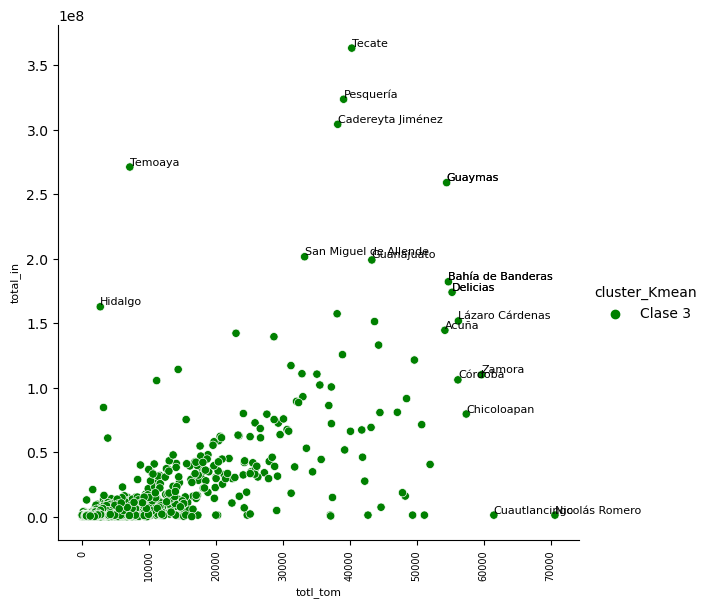

In [83]:
colors = ['green']    #'green', 'purple', 'orange'
Col_Var_y=["total_in"]
Col_Var_x1=["totl_tom"]

g = sns.pairplot(
    df_clasif_3, 
    x_vars=Col_Var_x1, 
    y_vars=Col_Var_y, 
    height=6, 
    hue='cluster_Kmean',
    palette=colors
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)


top_20_indices = df_clasif_3['total_in'].nlargest(10).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'total_in'
        for idx in top_20_indices:
            row = df_clasif_3.loc[idx]
            ax.text(
                row[x_var], 
                row[y_var], 
                row['Name_Mun'], 
                fontsize=8, 
                ha='left', 
                va='bottom'
            )


top_20_indices2 = df_clasif_3['totl_tom'].nlargest(10).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'total_in'
        for idx in top_20_indices2:
            row = df_clasif_3.loc[idx]
            ax.text(
                row[x_var], 
                row[y_var], 
                row['Name_Mun'], 
                fontsize=8, 
                ha='left', 
                va='bottom'
            )
            


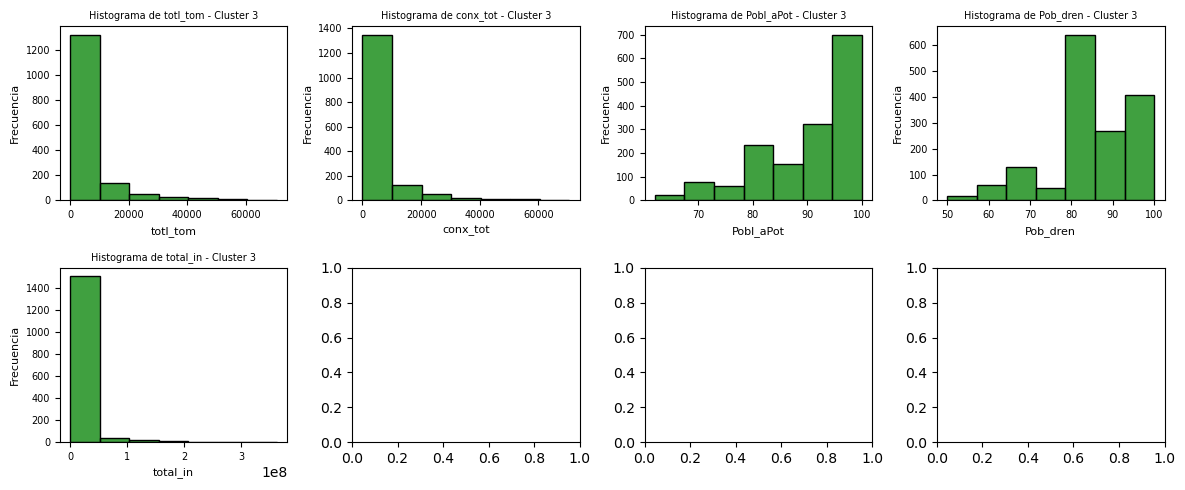

In [84]:
colors = ['red', 'blue', 'green', 'purple', 'orange'] 

variables = ['totl_tom', 'conx_tot', 'Pobl_aPot','Pob_dren', 'total_in']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))  
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(df_clasif_3 [var], ax=axes[i], kde=False, color=colors[2], bins=7) 
    axes[i].set_title(f'Histograma de {var} - Cluster 3', fontsize=7)
    axes[i].set_xlabel(var, fontsize=8)
    axes[i].set_ylabel('Frecuencia', fontsize=8)
    axes[i].tick_params(axis='x', labelsize=7)
    axes[i].tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

In [85]:
df_clasif_3.sort_values("total_in",ascending=False).head(10)[['folio','Name_Ent','Name_Mun','totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', "total_in"]]

,folio,Name_Ent,Name_Mun,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
13,2003,Baja California,Tecate,"40,299.000","31,503.000",79.000,96.000,"363,176,392.800"
998,19041,Nuevo León,Pesquería,"39,083.000","38,301.000",96.000,99.000,"323,543,747.930"
966,19009,Nuevo León,Cadereyta Jiménez,"38,204.000","35,824.000",96.000,99.000,"304,115,196.880"
750,15087,Estado de México,Temoaya,"7,151.000","7,963.548",100.000,100.000,"271,031,627.770"
1929,26029,Sonora,Guaymas,"54,470.000","40,541.000",65.000,78.000,"258,912,862.000"
330,11003,Guanajuato,San Miguel de Allende,"33,258.000","27,948.000",94.000,95.000,"201,489,061.140"
342,11015,Guanajuato,Guanajuato,"43,297.000","43,216.000",98.000,68.000,"198,997,037.520"
957,18020,Nayarit,Bahía de Banderas,"54,731.000","46,521.000",85.000,98.000,"182,122,366.000"
226,8021,Chihuahua,Delicias,"55,279.000","51,920.000",98.000,98.000,"173,953,598.200"
2005,28016,Tamaulipas,Hidalgo,"2,738.000","1,500.000",85.000,95.000,"162,732,399.000"


#### **5.5.4 Cluster Clase 2. Baja cobertura de agua pot. y alcantarillado**

In [86]:
df_clasif_2 = df_clasif[df_clasif['cluster_Kmean'] == "Clase 2"]
df_clasif_2.describe().T

,count,mean,std,min,25%,50%,75%,max
totl_tom,399.000,"3,653.638","5,906.286",79.000,690.000,"1,762.000","3,679.000","58,183.000"
conx_tot,399.000,"2,655.520","4,617.663",11.000,400.000,"1,177.000","2,686.500","40,000.000"
Pob_dren,399.000,34.827,15.286,0.600,25.000,35.000,48.215,63.000
Pobl_aPot,399.000,61.986,26.547,10.000,40.000,70.000,80.000,100.000
total_in,399.000,"4,052,318.967","13,136,540.625","3,390.000","315,455.035","1,271,509.000","1,584,605.560","142,660,111.250"
cluster_hier,399.000,0.050,0.446,0.000,0.000,0.000,0.000,4.000


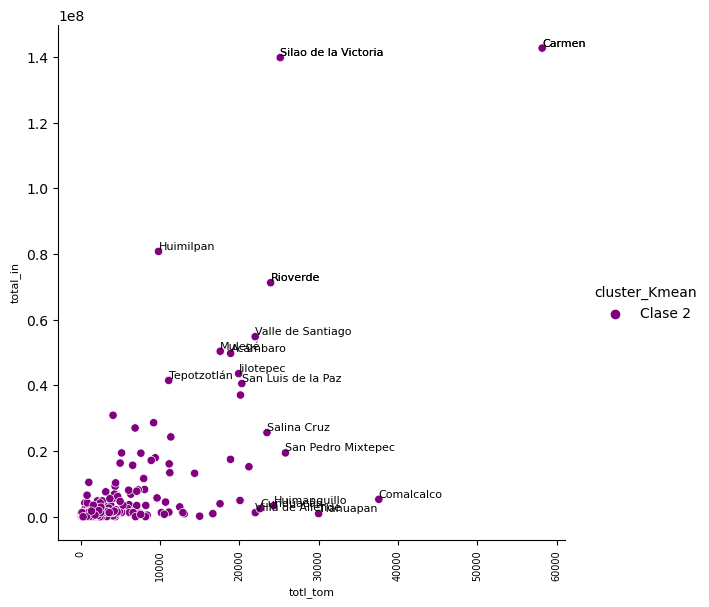

In [87]:
colors = ['purple']    #'green', 'purple', 'orange'
Col_Var_y=["total_in"]
Col_Var_x1=["totl_tom"]

g = sns.pairplot(
    df_clasif_2, 
    x_vars=Col_Var_x1, 
    y_vars=Col_Var_y, 
    height=6, 
    hue='cluster_Kmean',
    palette=colors
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)


top_20_indices = df_clasif_2['total_in'].nlargest(10).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'total_in'
        for idx in top_20_indices:
            row = df_clasif_2.loc[idx]
            ax.text(
                row[x_var], 
                row[y_var], 
                row['Name_Mun'], 
                fontsize=8, 
                ha='left', 
                va='bottom'
            )


top_20_indices2 = df_clasif_2['totl_tom'].nlargest(10).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'total_in'
        for idx in top_20_indices2:
            row = df_clasif_2.loc[idx]
            ax.text(
                row[x_var], 
                row[y_var], 
                row['Name_Mun'], 
                fontsize=8, 
                ha='left', 
                va='bottom'
            )
            


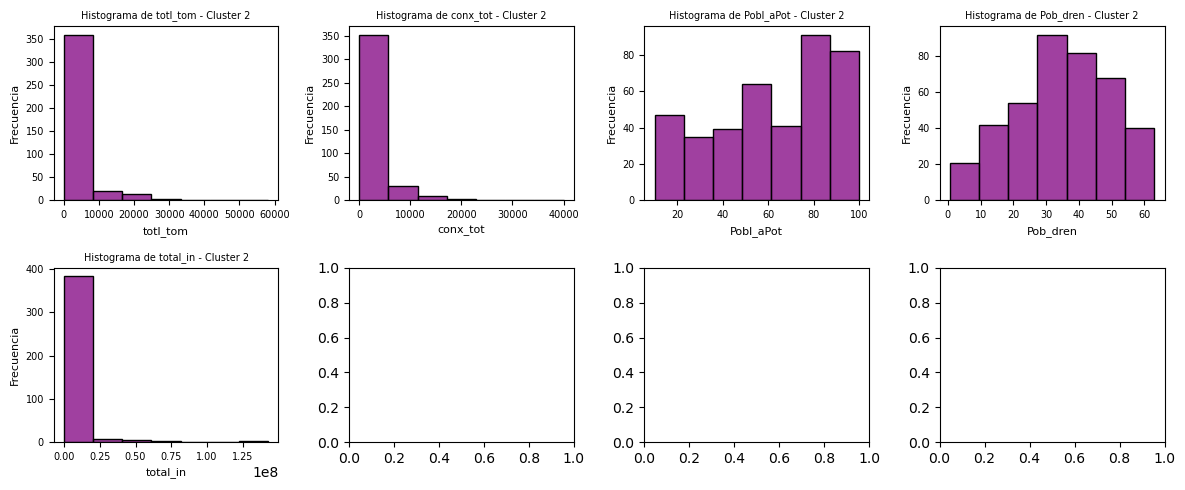

In [88]:
colors = ['red', 'blue', 'green', 'purple', 'orange'] 

variables = ['totl_tom', 'conx_tot', 'Pobl_aPot','Pob_dren', 'total_in']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))  
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(df_clasif_2 [var], ax=axes[i], kde=False, color=colors[3], bins=7) 
    axes[i].set_title(f'Histograma de {var} - Cluster 2', fontsize=7)
    axes[i].set_xlabel(var, fontsize=8)
    axes[i].set_ylabel('Frecuencia', fontsize=8)
    axes[i].tick_params(axis='x', labelsize=7)
    axes[i].tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

In [89]:
df_clasif_4.sort_values("total_in",ascending=False).head(10)[['folio','Name_Ent','Name_Mun','totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', "total_in"]]

,folio,Name_Ent,Name_Mun,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
15,2005,Baja California,Playas de Rosarito,"42,564.000","29,911.000",97.000,98.000,"1,256,686,180.000"
1075,20067,Oaxaca,Oaxaca de Juárez,"79,612.000","70,535.000",85.000,85.000,"896,679,216.000"
767,15104,Estado de México,Tlalnepantla de Baz,"153,989.000","153,503.000",98.940,99.700,"883,097,708.220"
1003,19046,Nuevo León,San Nicolás de los Garza,"137,240.000","137,143.000",96.000,99.000,"727,234,555.470"
1894,25012,Sinaloa,Mazatlán,"180,693.000","180,693.000",95.000,95.000,"672,631,291.000"
2027,28038,Tamaulipas,Tampico,"95,853.000","98,568.000",96.000,99.000,"656,136,464.000"
1821,23008,Quintana Roo,Solidaridad,"113,027.000","109,775.000",97.000,100.000,"638,898,382.000"
772,15109,Estado de México,Tultitlán,"142,048.000","143,608.000",98.700,99.000,"626,345,008.210"
11,2001,Baja California,Ensenada,"153,991.000","112,029.000",59.000,79.000,"625,449,452.220"
700,15037,Estado de México,Huixquilucan,"49,773.000","99,546.000",98.000,96.000,"592,927,386.100"


#### **5.5.5 Cluster Clase 1. Muy baja cobertura de agua pot. y alcantarillado**

In [90]:
df_clasif_1 = df_clasif[df_clasif['cluster_Kmean'] == "Clase 1"]
df_clasif_1.describe().T

,count,mean,std,min,25%,50%,75%,max
totl_tom,347.000,"2,125.500","3,492.313",30.000,343.500,850.000,"2,475.000","36,269.000"
conx_tot,347.000,"2,177.743","3,683.194",38.587,321.820,800.000,"2,476.927","39,983.000"
Pob_dren,347.000,79.791,9.679,45.000,80.000,80.000,80.000,100.000
Pobl_aPot,347.000,36.376,16.304,10.000,22.000,37.000,51.500,63.000
total_in,347.000,"2,654,815.858","9,987,260.579",321.000,"93,400.000","1,271,509.000","1,271,509.000","141,761,159.290"
cluster_hier,347.000,3.896,0.637,0.000,4.000,4.000,4.000,4.000


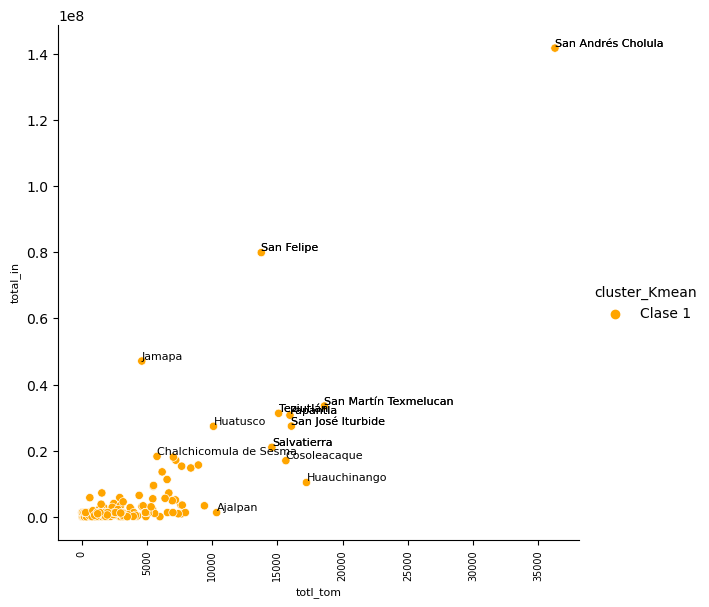

In [91]:
colors = ['orange']    #'green', 'purple', 'orange'
Col_Var_y=["total_in"]
Col_Var_x1=["totl_tom"]

g = sns.pairplot(
    df_clasif_1, 
    x_vars=Col_Var_x1, 
    y_vars=Col_Var_y, 
    height=6, 
    hue='cluster_Kmean',
    palette=colors
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)


top_20_indices = df_clasif_1['total_in'].nlargest(10).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'total_in'
        for idx in top_20_indices:
            row = df_clasif_1.loc[idx]
            ax.text(
                row[x_var], 
                row[y_var], 
                row['Name_Mun'], 
                fontsize=8, 
                ha='left', 
                va='bottom'
            )


top_20_indices2 = df_clasif_1['totl_tom'].nlargest(10).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'total_in'
        for idx in top_20_indices2:
            row = df_clasif_1.loc[idx]
            ax.text(
                row[x_var], 
                row[y_var], 
                row['Name_Mun'], 
                fontsize=8, 
                ha='left', 
                va='bottom'
            )
            


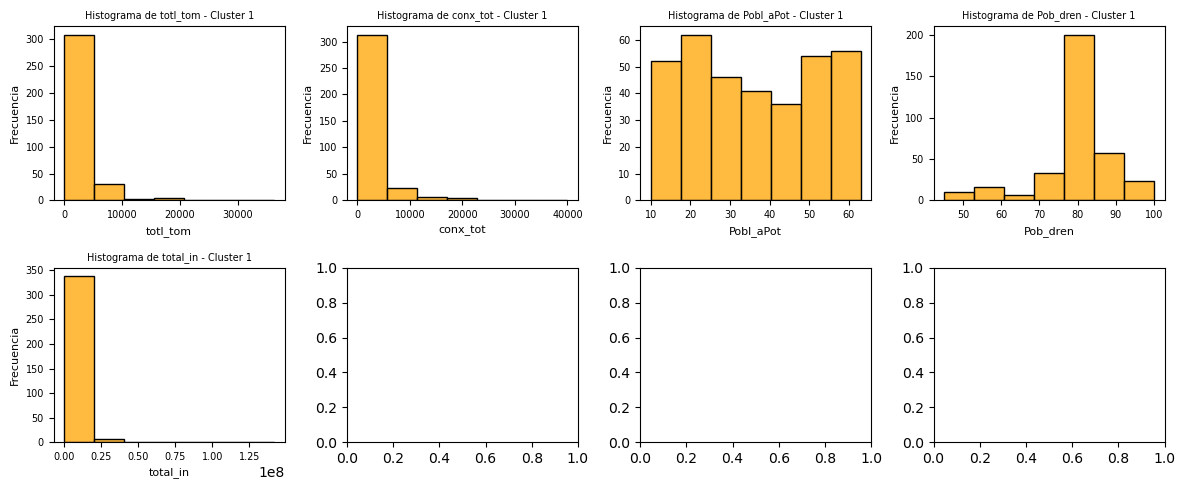

In [92]:
colors = ['red', 'blue', 'green', 'purple', 'orange'] 

variables = ['totl_tom', 'conx_tot', 'Pobl_aPot','Pob_dren', 'total_in']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))  
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(df_clasif_1 [var], ax=axes[i], kde=False, color=colors[4], bins=7) 
    axes[i].set_title(f'Histograma de {var} - Cluster 1', fontsize=7)
    axes[i].set_xlabel(var, fontsize=8)
    axes[i].set_ylabel('Frecuencia', fontsize=8)
    axes[i].tick_params(axis='x', labelsize=7)
    axes[i].tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

In [93]:
df_clasif_5.sort_values("total_in",ascending=False).head(10)[['folio','Name_Ent','Name_Mun','totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', "total_in"]]

,folio,Name_Ent,Name_Mun,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
996,19039,Nuevo León,Monterrey,"335,097.000","331,865.000",96.000,99.000,"1,913,074,128.970"
1809,22014,Querétaro,Querétaro,"290,449.000","254,564.000",80.000,80.000,"1,895,036,863.000"
12,2002,Baja California,Mexicali,"356,964.000","315,632.000",84.000,98.000,"1,690,761,382.000"
696,15033,Estado de México,Ecatepec de Morelos,"428,144.000","389,221.000",80.000,89.000,"1,420,984,395.000"
1818,23005,Quintana Roo,Benito Juárez,"301,185.000","285,618.000",95.100,100.000,"1,363,658,394.000"
1930,26030,Sonora,Hermosillo,"322,638.000","304,325.000",96.000,98.000,"1,223,248,221.130"
1888,25006,Sinaloa,Culiacán,"339,960.000","306,183.000",99.000,99.500,"1,201,402,177.000"
720,15057,Estado de México,Naucalpan de Juárez,"159,115.000","159,115.000",95.210,99.000,"1,120,061,885.170"
769,15106,Estado de México,Toluca,"212,640.000","165,409.000",98.500,96.000,"993,679,907.000"
2011,28022,Tamaulipas,Matamoros,"161,859.000","180,138.081",80.000,94.000,"898,915,604.000"


#### **5.5.7 Resumen Cluster**

In [94]:
df_clasif[['cluster_Kmean','totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', 'total_in']].groupby('cluster_Kmean').mean()

,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
cluster_Kmean,,,,,
Clase 1,"2,125.500","2,177.743",79.791,36.376,"2,654,815.858"
Clase 2,"3,653.638","2,655.520",34.827,61.986,"4,052,318.967"
Clase 3,"5,909.569","5,418.881",84.143,89.932,"8,955,772.170"
Clase 4,"108,525.258","99,790.023",90.703,93.058,"391,604,825.901"
Clase 5,"268,229.100","257,065.522",93.124,96.671,"1,083,648,154.624"


In [95]:
df_clasif[['cluster_Kmean','totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', 'total_in']].groupby('cluster_Kmean').max()

,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
cluster_Kmean,,,,,
Clase 1,"36,269.000","39,983.000",100.000,63.000,"141,761,159.290"
Clase 2,"58,183.000","40,000.000",63.000,100.000,"142,660,111.250"
Clase 3,"70,645.000","70,645.000",100.000,100.000,"363,176,392.800"
Clase 4,"200,470.000","200,040.000",100.000,100.000,"1,256,686,180.000"
Clase 5,"428,144.000","389,221.000",100.000,100.000,"1,913,074,128.970"


In [96]:
df_clasif[['cluster_Kmean','totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', 'total_in']].groupby('cluster_Kmean').min()

,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
cluster_Kmean,,,,,
Clase 1,30.000,38.587,45.000,10.000,321.000
Clase 2,79.000,11.000,0.600,10.000,"3,390.000"
Clase 3,4.000,4.000,50.000,62.000,"1,000.000"
Clase 4,"38,063.000",74.000,59.000,57.000,"1,271,509.000"
Clase 5,"159,115.000","159,115.000",80.000,80.000,"689,929,731.810"


# **6. Modelo de regresión para estimar el Ingreso OAPAS**
---

(2394, 11)


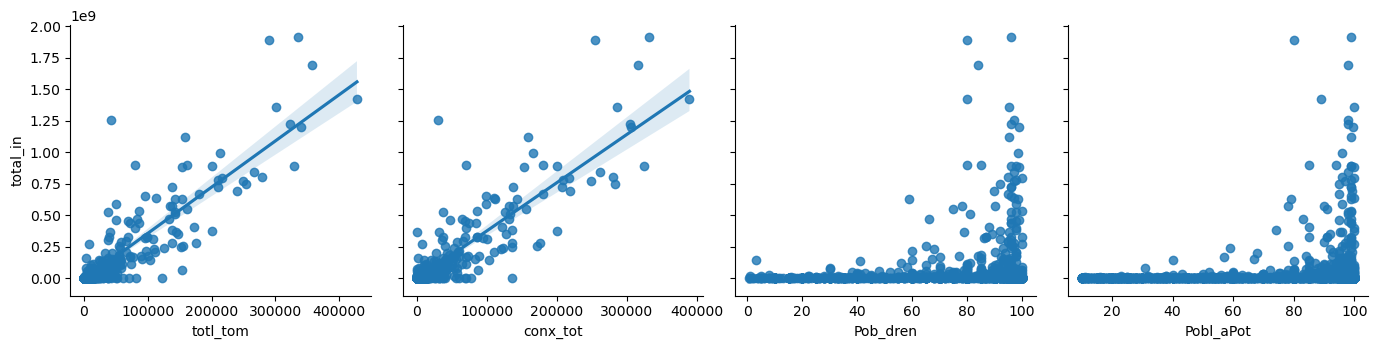

In [97]:
print(df_clasif.shape)
Col_Var_x1 =['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot']  #'ext_sani_km', 'ext_co_km',
Col_Var_y =['total_in']
sns.pairplot(df_clasif,x_vars=Col_Var_x1 , y_vars=Col_Var_y ,height=3.5, aspect=1, kind='reg')
plt.show()

### **6.1 Exploración de datos: Matriz de correlación**

In [98]:
df_clasif_reg = df_clasif.iloc[:, [0,1,2,3,4]].copy() #5,6
my_corr1 = df_clasif_reg.corr()                           ##Calcula matriz de correlación de variables numéricas del df
my_corr1                                                  ## Muestra la matriz de correlación

,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
totl_tom,1.000,0.986,0.139,0.154,0.899
conx_tot,0.986,1.000,0.152,0.149,0.892
Pob_dren,0.139,0.152,1.000,0.361,0.124
Pobl_aPot,0.154,0.149,0.361,1.000,0.124
total_in,0.899,0.892,0.124,0.124,1.000


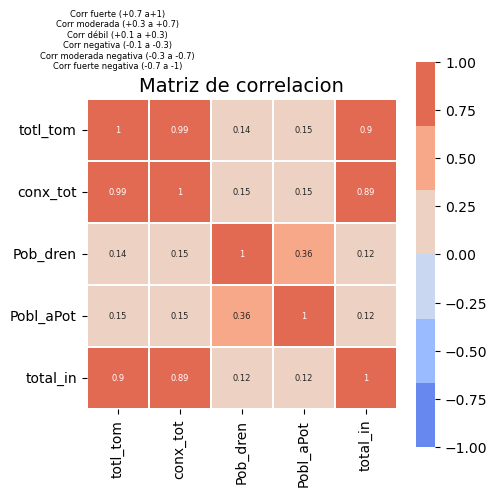

In [99]:
plt.figure(figsize=(5,5))
sns.heatmap(my_corr1, annot=True, square=True,
            cmap=sns.color_palette("coolwarm"),
            vmax=1,      #np.max(np.sort(my_corr.values)[:,-2]),
            vmin=-1,
           linewidths=0.3,
            annot_kws={"size": 6})
plt.title("Matriz de correlacion", fontsize=14)
plt.text(0.5,-0.5,"Corr fuerte (+0.7 a+1)\nCorr moderada (+0.3 a +0.7)\nCorr débil (+0.1 a +0.3)\nCorr negativa (-0.1 a -0.3)\nCorr moderada negativa (-0.3 a -0.7)\nCorr fuerte negativa (-0.7 a -1)",
         fontsize=6,  # Tamaño de la fuente del texto adicional
         ha='center')

plt.show()

### **6.2 Definición feautures y separación de datos (test,train)**

In [100]:
###4.1 Definición de Variable dependinte y e independientes (features)
from sklearn.model_selection import train_test_split  

df_clasif_reg1_X =df_clasif_reg.copy() 

y = df_clasif_reg['total_in'].values                           ## Variable de salida y= Ingreso total en pesos
df_clasif_reg1_X.drop(columns=["total_in"],inplace=True)        ## Variable independientes xs= features
X_1 = df_clasif_reg1_X.values                                   ## Definir la matriz de features

## 4.2 Separación de datos Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X_1,y, train_size=0.80, random_state=4595)

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((1915, 4), (1915,))
Prueba: ((479, 4), (479,))


### **6.3 Transformación de datos y entrenamiento**

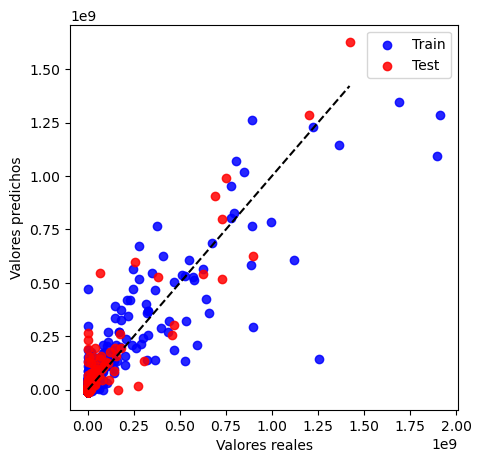

In [101]:
## Transformar los datos en entrenamiento (train) y prueba (test) con MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
MMscaler =  MinMaxScaler()
X_train_MMS = MMscaler.fit_transform(X_train)
X_test_MMS  = MMscaler.transform(X_test)

## 4.4 Entrenar el modelo con datos de entrenamiento X_train y y_train
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_MMS, y_train)

## Calcular predicciones usando las variables predictoras del conjunto de prueba
y_pred_test = lr.predict(X_test_MMS)

## Representar gráficamente esta comparación
y_pred_train = lr.predict(X_train_MMS)

xaxis = np.linspace(np.min(y_test),np.max(y_test),100)
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_train, y_pred_train, c='blue',alpha=0.85,label='Train')
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85,label='Test')
plt.plot(xaxis,xaxis,'k--')  # La línea de referencia y_pred=y_real
plt.legend(loc='best')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

### **6.4 Validación y ecuación**

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

columns=['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot']  #'ext_sani_km', 'ext_co_km',

print("________________Modelo Cluster 0,1,2.  Modelo dos variables Normalizado con MinMaxScaler_______________\n")
print("*** La ecuación con coef normalizados (MinMaxScaler) para estimar el Ingreso es : \n")

#-------------------------------------------------------------------------------------------------------------
coef_scaled=lr.coef_
intercept_scaled = lr.intercept_
expression = "Ingreso= "
for coef, column in zip(coef_scaled, columns):
    expression += f"{coef:,.3f} {column} + "
expression = expression[:-2]   # Eliminar el último "+ " sobrante y luego imprimir
print(f" {expression} + {intercept_scaled}")

#-------------------------------------------------------------------------------------------------------------
X_min = MMscaler.data_min_
X_max = MMscaler.data_max_
X_range = X_max - X_min
coef_original = coef_scaled / X_range    # Revertir los coeficientes
intercept_original = intercept_scaled - np.sum(coef_scaled * (X_min / X_range))  # Revertir el intercepto
print("** La ecuación  para estimar Ingreso es : \n")
expression = "Ingreso= "
for coef, column in zip(coef_original, columns):
    expression += f"{coef:,.3f} {column} + "
expression = expression[:-2]   # Eliminar el último "+ " sobrante y luego imprimir
print(f" {expression} + {intercept_original} ")
print("_____________________________________________________________________________")

#-------------------------------------------------------------------------------------------------------------
y_pred_test = lr.predict(X_test_MMS)
y_pred_train = lr.predict(X_train_MMS)

print(f"R2 en la prueba: {lr.score(X_test_MMS,y_test)}")
print(f"MAE en el conjunto de prueba: {mean_absolute_error(y_test,y_pred_test)}")  # Esta es muy interpretativa
print(f"MSE en el conjunto de prueba: {mean_squared_error(y_test,y_pred_test)}")
print("   ")
#print(f"R2 en el entrenamiento: {lr_ElasticNet.score(X_train_MMS,y_train)}")
#print(f"MAE en el conjunto de entrenamiento: {mean_absolute_error(y_train,y_pred_train)}")  # Esta es muy interpretativa
#print(f"MSE en el conjunto de entrenamiento: {mean_squared_error(y_train,y_pred_train)}")

df_clasif=df_clasif.copy()
#df_clasif_1["Est_total_in_Mod1"]=(coef_original[0])*df_clasif_1["tom_mun"] + (coef_original[1])*df_clasif_1["tom_loc"]+intercept_original

ColX = df_clasif[['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot']]        ###Codigo para ejecutar el modelo #'ext_sani_km', 'ext_co_km',
ColNormX=MMscaler.transform(ColX)
Est_Mod_Python=lr.predict(ColNormX)                    ###Codigo para ejecutar el modelo
df_clasif["Est_Mod_Pythonlr"]=Est_Mod_Python

df_clasif["Error"]=(df_clasif["Est_Mod_Pythonlr"]-df_clasif["total_in"])
df_clasif["ErrorCuad"]=(df_clasif["Est_Mod_Pythonlr"]-df_clasif["total_in"])**2

MSE=(df_clasif["ErrorCuad"].mean())
RMSE=(df_clasif["ErrorCuad"].mean())**.5
ME=(df_clasif["Error"].mean())

print(f"El error  medio es    : {ME:,.4f} pesos")
print(f"El error cuad medio es: {MSE:,.4f} pesos")
print(f"El raiz del error cuad medio es: {RMSE:,.4f} pesos")
df_clasif.head(3)


________________Modelo Cluster 0,1,2.  Modelo dos variables Normalizado con MinMaxScaler_______________

*** La ecuación con coef normalizados (MinMaxScaler) para estimar el Ingreso es : 

 Ingreso= 1,179,163,502.054 totl_tom + 190,394,319.864 conx_tot + 85,457.608 Pob_dren + -8,261,607.967 Pobl_aPot  + -4572255.278850883
** La ecuación  para estimar Ingreso es : 

 Ingreso= 3,303.349 totl_tom + 573.717 conx_tot + 859.734 Pob_dren + -91,795.644 Pobl_aPot  + -3670322.9435380166 
_____________________________________________________________________________
R2 en la prueba: 0.838883484771118
MAE en el conjunto de prueba: 19742076.907679167
MSE en el conjunto de prueba: 2520434325859517.0
   
El error  medio es    : 801,189.2575 pesos
El error cuad medio es: 3,047,790,881,226,623.5000 pesos
El raiz del error cuad medio es: 55,206,801.0414 pesos


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,cluster_hier,folio,cve_ent,Name_Ent,Name_Mun,cluster_Kmean,Est_Mod_Pythonlr,Error,ErrorCuad
0,"329,552.000","324,115.000",98.000,99.000,"889,622,823.430",1,1001,1,Aguascalientes,Aguascalientes,Clase 5,"1,261,901,779.088","372,278,955.658","138,591,620,825,909,376.000"
1,"14,473.000","13,738.000",80.000,70.000,"914,517.000",2,1002,1,Aguascalientes,Asientos,Clase 3,"45,663,857.630","44,749,340.630","2,002,503,486,811,035.750"
2,"16,871.000","19,288.000",98.000,99.000,"42,545,534.000",2,1003,1,Aguascalientes,Calvillo,Clase 3,"54,122,820.090","11,577,286.090","134,033,553,214,705.328"


Text(0, 0.5, 'total_in')

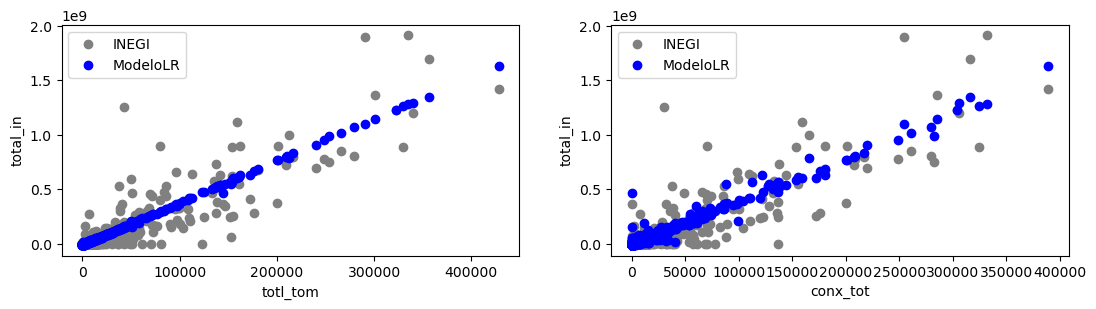

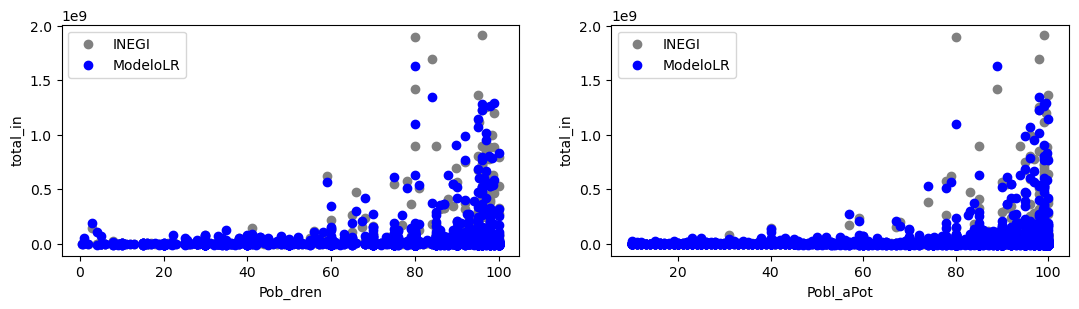

In [103]:

fig, axs = plt.subplots(1, 2, figsize=(13, 3))

axs[0].scatter(df_clasif["totl_tom"],df_clasif["total_in"], color='gray', label='INEGI')
axs[0].scatter(df_clasif["totl_tom"],df_clasif["Est_Mod_Pythonlr"], color='blue', label='ModeloLR')

axs[0].legend()
axs[0].set_xlabel("totl_tom")
axs[0].set_ylabel("total_in")

axs[1].scatter(df_clasif["conx_tot"],df_clasif["total_in"], color='gray', label='INEGI')
axs[1].scatter(df_clasif["conx_tot"],df_clasif["Est_Mod_Pythonlr"], color='blue', label='ModeloLR')

axs[1].legend()
axs[1].set_xlabel("conx_tot")
axs[1].set_ylabel("total_in")

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
axs[0].scatter(df_clasif["Pob_dren"],df_clasif["total_in"], color='gray', label='INEGI')
axs[0].scatter(df_clasif["Pob_dren"],df_clasif["Est_Mod_Pythonlr"], color='blue', label='ModeloLR')
axs[0].legend()
axs[0].set_xlabel("Pob_dren")
axs[0].set_ylabel("total_in")


axs[1].scatter(df_clasif["Pobl_aPot"],df_clasif["total_in"], color='gray', label='INEGI')
axs[1].scatter(df_clasif["Pobl_aPot"],df_clasif["Est_Mod_Pythonlr"], color='blue', label='ModeloLR')
axs[1].legend()
axs[1].set_xlabel("Pobl_aPot")
axs[1].set_ylabel("total_in")


In [104]:
df_clasif.head()

,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,cluster_hier,folio,cve_ent,Name_Ent,Name_Mun,cluster_Kmean,Est_Mod_Pythonlr,Error,ErrorCuad
0,"329,552.000","324,115.000",98.000,99.000,"889,622,823.430",1,1001,1,Aguascalientes,Aguascalientes,Clase 5,"1,261,901,779.088","372,278,955.658","138,591,620,825,909,376.000"
1,"14,473.000","13,738.000",80.000,70.000,"914,517.000",2,1002,1,Aguascalientes,Asientos,Clase 3,"45,663,857.630","44,749,340.630","2,002,503,486,811,035.750"
2,"16,871.000","19,288.000",98.000,99.000,"42,545,534.000",2,1003,1,Aguascalientes,Calvillo,Clase 3,"54,122,820.090","11,577,286.090","134,033,553,214,705.328"
3,"4,333.000","4,333.000",98.000,98.000,"7,223,000.000",2,1004,1,Aguascalientes,Cosío,Clase 3,"4,217,285.711","-3,005,714.289","9,034,318,385,234.531"
4,"35,095.000","34,851.000",96.000,98.000,"110,530,539.220",2,1005,1,Aguascalientes,Jesús María,Clase 3,"123,341,889.365","12,811,350.145","164,130,692,530,919.625"


In [105]:
df_unido_left = pd.merge(df, df_clasif, on='folio', how='left')
df_unido_left.to_excel('df_unido_left.xlsx', index=False, engine='openpyxl')

In [106]:
df_unido_right = pd.merge(df, df_clasif, on='folio', how='right')
df_unido_right.to_excel('df_unido_right.xlsx', index=False, engine='openpyxl')